# Missing values imputation	

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, ShuffleSplit, StratifiedShuffleSplit
import ds_functions as ds
from numpy import percentile
from subprocess import call

In [10]:
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
target = 'IS_TOXIC'

original_data = data.copy()

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')

if False in original_data == data: 
    print ("Dataset has changed\n")
else :
    print ("Dataset has not change\n")

data

Dataset has not change



MOL_FIG1 MOL_FIG2 MOL_FIG3 MOL_FIG4 MOL_FIG5 MOL_FIG6 MOL_FIG7 MOL_FIG8  \
0           0        0        0        0        0        0        0        0   
1           0        0        1        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        1   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8987        0        0        0        0        0        0        0        1   
8988        0        1        0        0        0        1        0        1   
8989        0        0        0        0        0        0        0        1   
8990        0        0        0        0        0        0        0        0   
8991        0        0        1        0        0        0        0        0   

     MOL_FIG9 MOL_FIG10  ... MOL_FIG1016 MOL_FIG1017 MOL_FIG1018 MOL_FIG1019  \
0           0         0  ...           0           0           0           0   
1           0         0  ...           0           0           0           0   
2           0         0  ...           0           0           1           0   
3           0         0  ...           0           0           0           0   
4           0         0  ...           0           0           0           0   
...       ...       ...  ...         ...         ...         ...         ...   
8987        0         0  ...           0           0           0           1   
8988        0         0  ...           0           0           0           1   
8989        0         0  ...           0           0           0           0   
8990        0         0  ...           0           0           0           0   
8991        0         0  ...           1           0           0           0   

     MOL_FIG1020 MOL_FIG1021 MOL_FIG1022 MOL_FIG1023 MOL_FIG1024  IS_TOXIC  
0              0           0           0           0           0  negative  
1              0           0           0           0           0  negative  
2              0           0           0           0           0  negative  
3              0           0           0           0           0  negative  
4              0           0           0           0           0  negative  
...          ...         ...         ...         ...         ...       ...  
8987           0           0           0           0           0  negative  
8988           0           0           0           0           0  negative  
8989           0           0           0           1           0  negative  
8990           0           0           0           0           0  negative  
8991           0           0           0           0           0  negative  

[8992 rows x 1025 columns]

# Outliers imputation

MOL_FIG1 MOL_FIG2 MOL_FIG3 MOL_FIG4 MOL_FIG5 MOL_FIG6 MOL_FIG7 MOL_FIG8  \
0           0        0        0        0        0        0        0        0   
1           0        0        1        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        1   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8987        0        0        0        0        0        0        0        1   
8988        0        1        0        0        0        1        0        1   
8989        0        0        0        0        0        0        0        1   
8990        0        0        0        0        0        0        0        0   
8991        0        0        1        0        0        0        0        0   

     MOL_FIG9 MOL_FIG10  ... MOL_FIG1016 MOL_FIG1017 MOL_FIG1018 MOL_FIG1019  \
0           0         0  ...           0           0           0           0   
1           0         0  ...           0           0           0           0   
2           0         0  ...           0           0           1           0   
3           0         0  ...           0           0           0           0   
4           0         0  ...           0           0           0           0   
...       ...       ...  ...         ...         ...         ...         ...   
8987        0         0  ...           0           0           0           1   
8988        0         0  ...           0           0           0           1   
8989        0         0  ...           0           0           0           0   
8990        0         0  ...           0           0           0           0   
8991        0         0  ...           1           0           0           0   

     MOL_FIG1020 MOL_FIG1021 MOL_FIG1022 MOL_FIG1023 MOL_FIG1024  IS_TOXIC  
0              0           0           0           0           0  negative  
1              0           0           0           0           0  negative  
2              0           0           0           0           0  negative  
3              0           0           0           0           0  negative  
4              0           0           0           0           0  negative  
...          ...         ...         ...         ...         ...       ...  
8987           0           0           0           0           0  negative  
8988           0           0           0           0           0  negative  
8989           0           0           0           1           0  negative  
8990           0           0           0           0           0  negative  
8991           0           0           0           0           0  negative  

[8992 rows x 1025 columns]

In [4]:
def remove_outliers(data):
    rows_to_drop=set()
    for var in data:
        val_max = data[var].max()
        val_min = data[var].min()
        quartiles = percentile(data[var], [25, 50, 75])

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            print(var + " as outliers")
            count=0
            outliers_num = 0
            for ele in data[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    outliers_num+=1
                    rows_to_drop.add(count)
                count+=1
            print("Outliers number = ",outliers_num)
            print("Outliers percentage = ",round((outliers_num*100)/len(data[var]),3))
            print()
    clean_data = data.drop(rows_to_drop, axis=0)
    return clean_data

In [6]:
def update_outliers(original_data, clean_data):
    columns_to_update=[]
    for var in original_data:
        val_max = original_data[var].max()
        val_min = original_data[var].min()
        quartiles = percentile(original_data[var], [25, 50, 75])

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr
        elements_to_update = []

        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            print(var + " as outliers")
            count=0
            outliers_num = 0
            for ele in original_data[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    outliers_num+=1
                    elements_to_update.append(ele)

        dic = {var:elements_to_update}
        
        columns_to_update.append(dic)
        
        
    updated_data = original_data.copy()
    
    for dic in columns_to_update:
        key = list(dic.keys())[0]
        values = list(dic.values())[0]
               
        if len(values) != 0:
            if type(values[0]) == float:
                mean_var = clean_data[key].mean()
                mean_list = list([mean_var]*len(values))
            else:
                mean_var = clean_data[key].mean()
                mean_list = list([int(mean_var)]*len(values))
                        
            updated_data[key] = updated_data[key].replace(values,mean_list)
            
    return updated_data

In [ ]:
clean_data = remove_outliers(data)
clean_data

In [ ]:
updated_data = update_outliers(data, clean_data)
updated_data

updated_data_vars = updated_data.select_dtypes(include='object')
updated_data[updated_data_vars.columns] = updated_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
updated_data.dtypes

# Decision Trees

<Figure size 600x450 with 0 Axes>

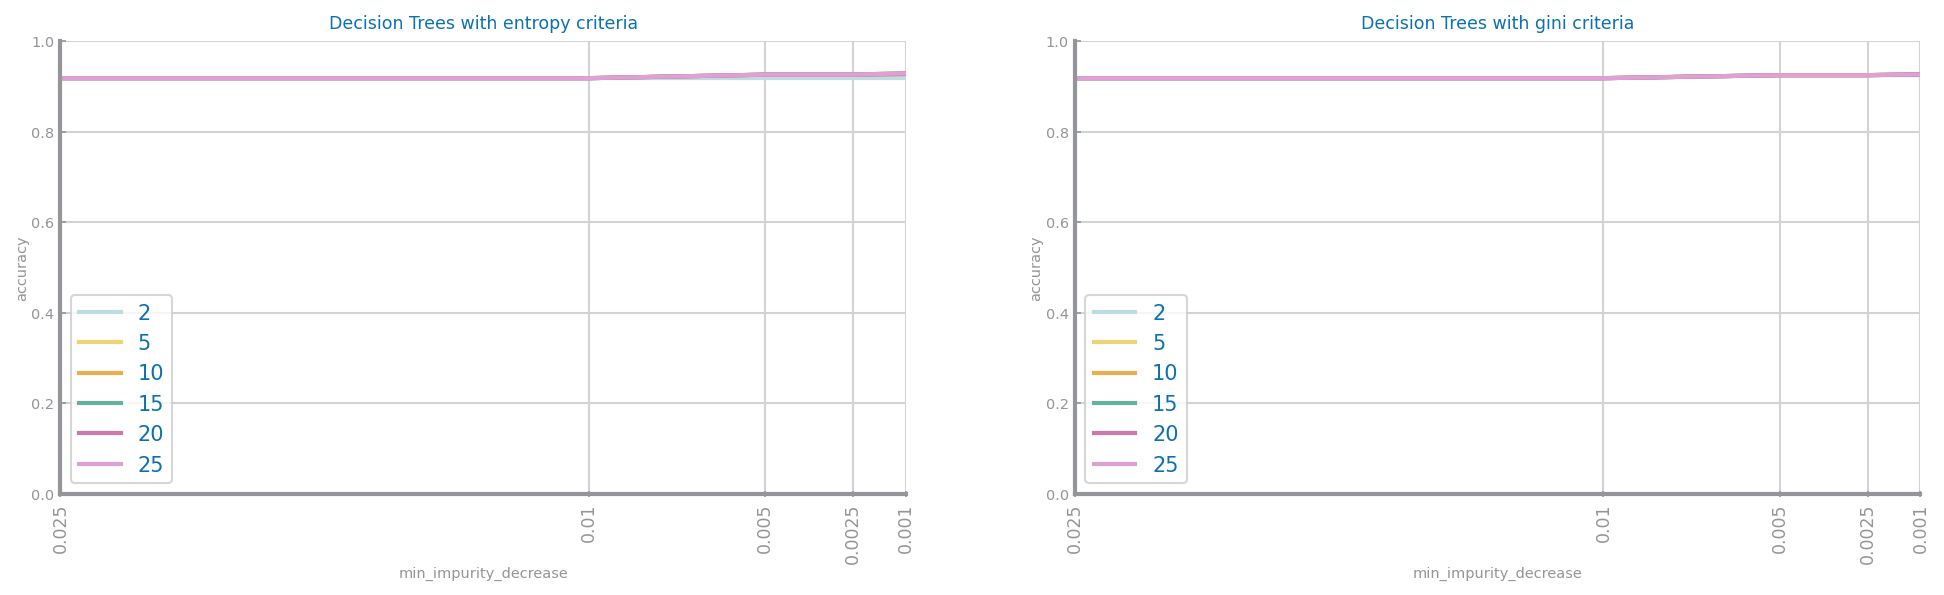

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


In [1]:
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
original_data = data.copy()
y: np.ndarray = original_data.pop('IS_TOXIC').values
X: np.ndarray = original_data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None
n = 6
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.3f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Confusion Matrix Test
TruePositives:  2473
FalsePositives:  188
TrueNegatives:  34
FalseNegatives:  3


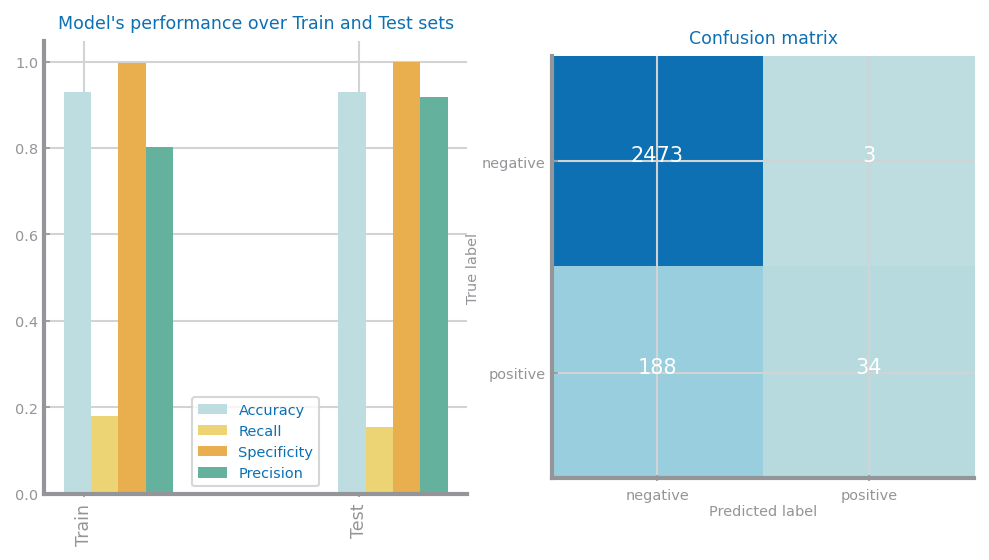

In [2]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

In [12]:
def decision_tree_cross_validation(num_splits, data, n=5, splitting="StratifiedKFold"):
    orig_data = data.copy()
    y: np.ndarray = orig_data.pop('IS_TOXIC').values
    X: np.ndarray = orig_data.values
    labels = pd.unique(y)
    
    if splitting == "StratifiedKFold":
        cv = StratifiedKFold(n_splits=num_splits, random_state=50, shuffle=False)
        cv_split = cv.split(X, y)
    elif splitting == "KFold":
        cv = KFold(n_splits=num_splits, random_state=50, shuffle=False)
        cv_split = cv.split(X)
    elif splitting == "ShuffleSplit":
        cv = ShuffleSplit(n_splits=num_splits, test_size=.25, random_state=0)
        cv_split = cv.split(X)
    else:
        cv = StratifiedShuffleSplit(n_splits=num_splits, test_size=.25, random_state=0)
        cv_split = cv.split(X, y)
        
    for train_index, test_index in cv_split:
        trnX, tstX = X[train_index], X[test_index]
        trnY, tstY = y[train_index], y[test_index]
        best = ('',  0, 0.0)
        last_best = 0
        best_tree = None

        min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
        max_depths = [2, 5, 10, 15, 20, 25]
        criteria = ['entropy', 'gini']
        plt.figure()
        fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
        for k in range(len(criteria)):
            f = criteria[k]
            values = {}
            for d in max_depths:
                yvalues = []
                for imp in min_impurity_decrease:
                    tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                    tree.fit(trnX, trnY)
                    prdY = tree.predict(tstX)
                    yvalues.append(metrics.accuracy_score(tstY, prdY))
                    if yvalues[-1] > last_best:
                        best = (f, d, imp)
                        last_best = yvalues[-1]
                        best_tree = tree

                values[d] = yvalues
            ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                                   xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

        plt.show()
        print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.3f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

    prd_trn = best_tree.predict(trnX)
    prd_tst = best_tree.predict(tstX)
    ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

    dot_data = export_graphviz(best_tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
    call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600']) # Convert to png
    if best_tree.tree_.node_count > 40:
        plt.figure(figsize = (19, 24))
    else:
        plt.figure(figsize = (8, 10))
    plt.imshow(plt.imread('dtree.png'))
    plt.axis('off')
    plt.title("Learned tree for " + splitting + " cross-validator")
    plt.show()

<Figure size 600x450 with 0 Axes>

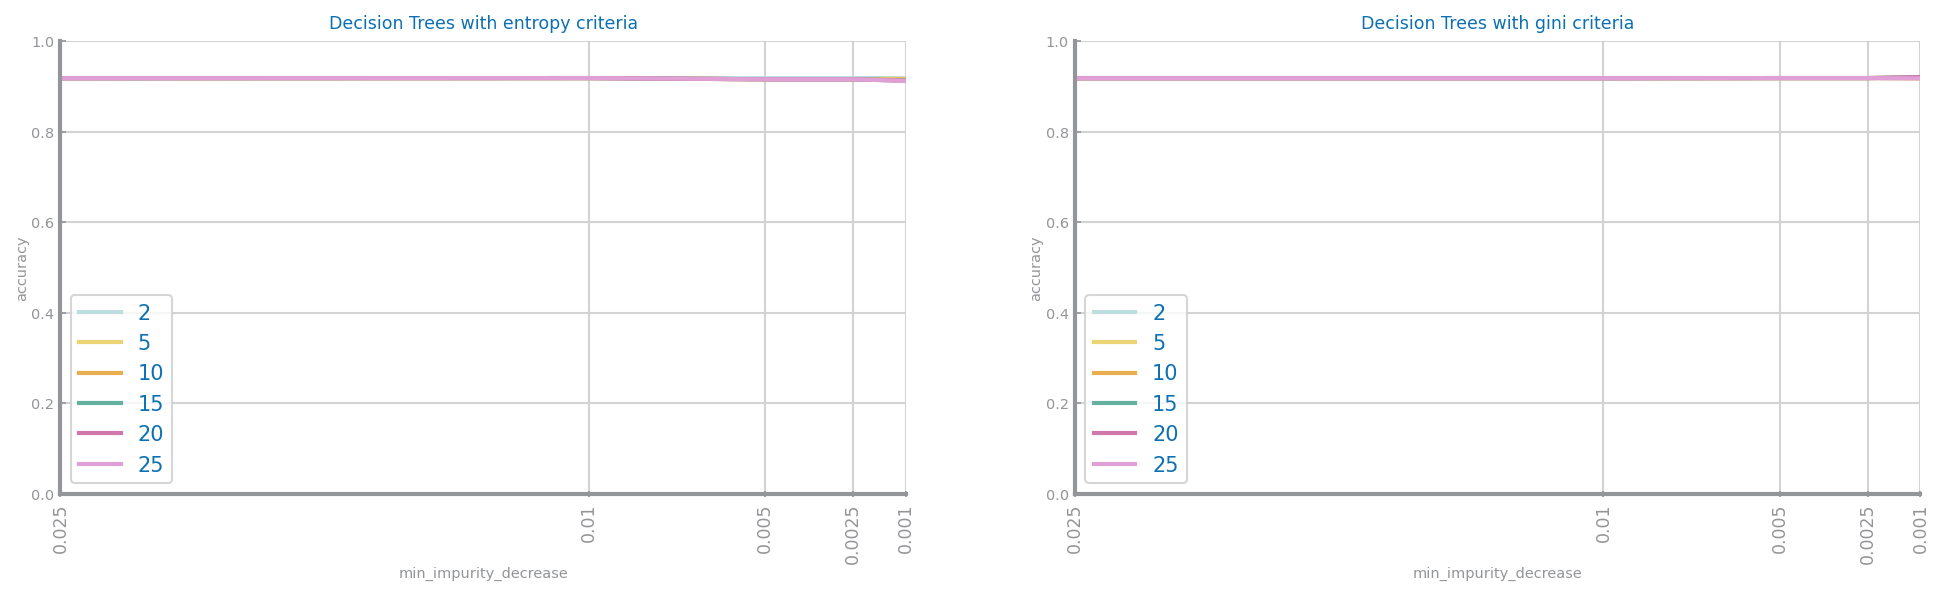

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.92


<Figure size 600x450 with 0 Axes>

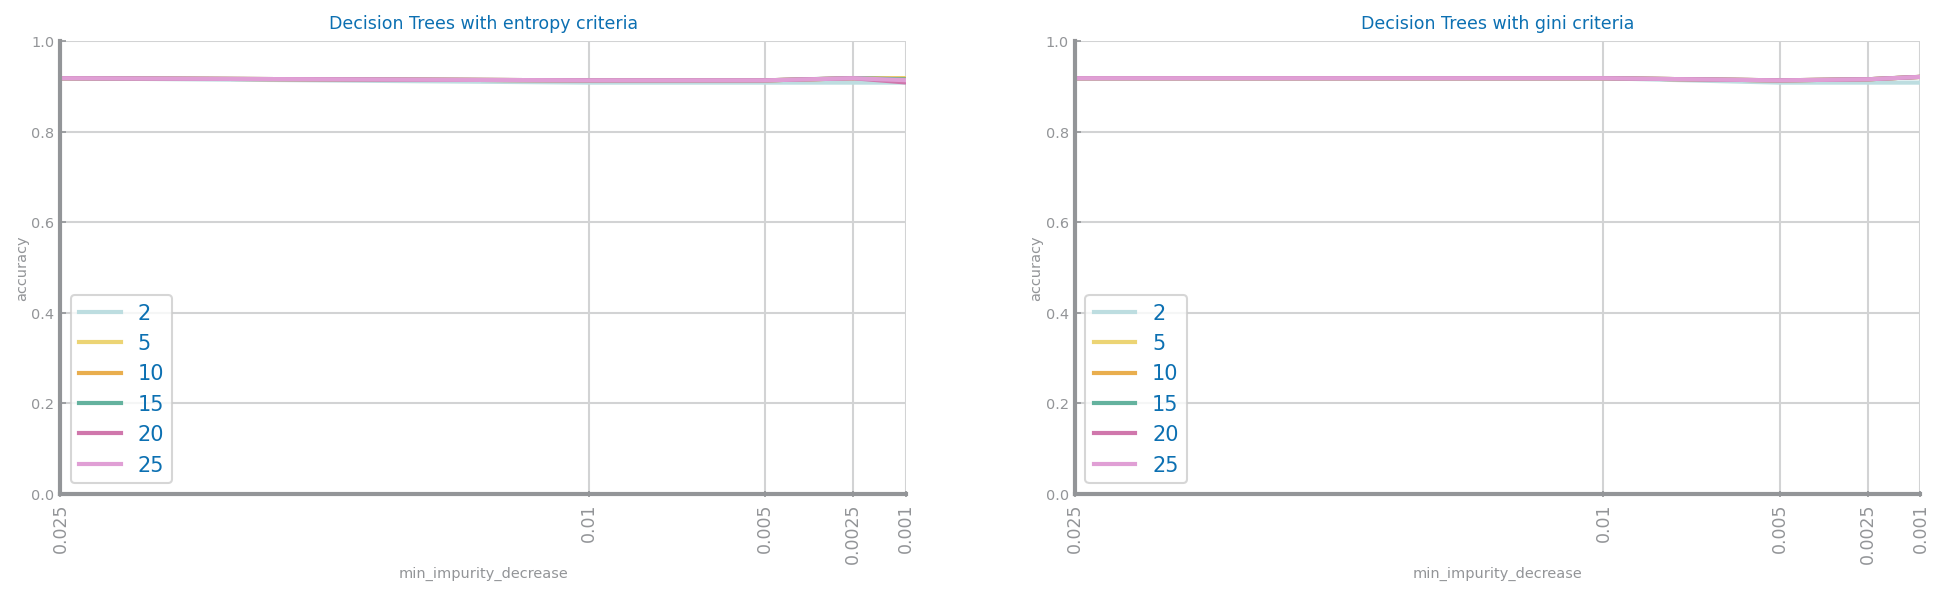

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.92


<Figure size 600x450 with 0 Axes>

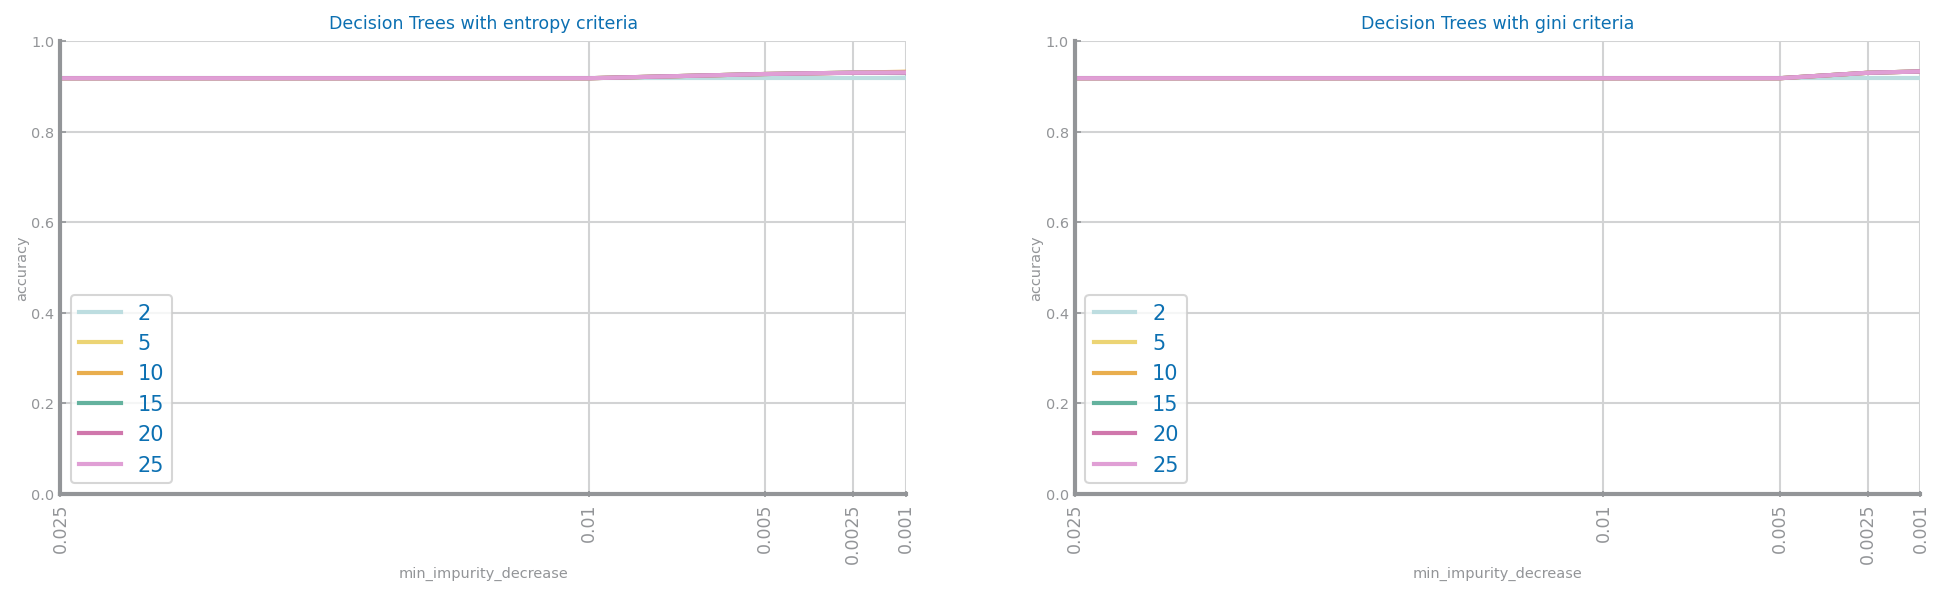

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93
Confusion Matrix Test
TruePositives:  2703
FalsePositives:  155
TrueNegatives:  92
FalseNegatives:  47


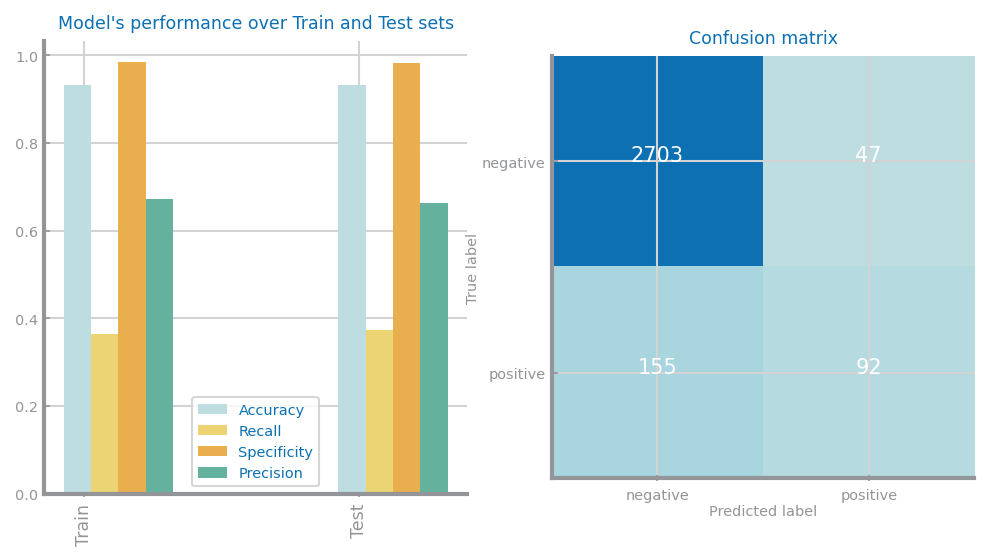

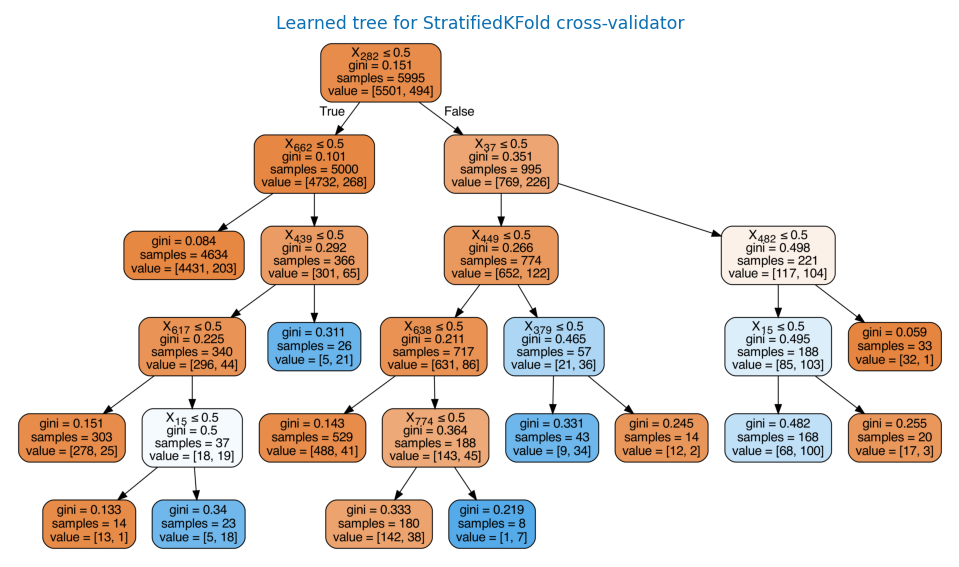

In [4]:
decision_tree_cross_validation(num_splits=3, data=data, n=3, splitting="StratifiedKFold")

<Figure size 600x450 with 0 Axes>

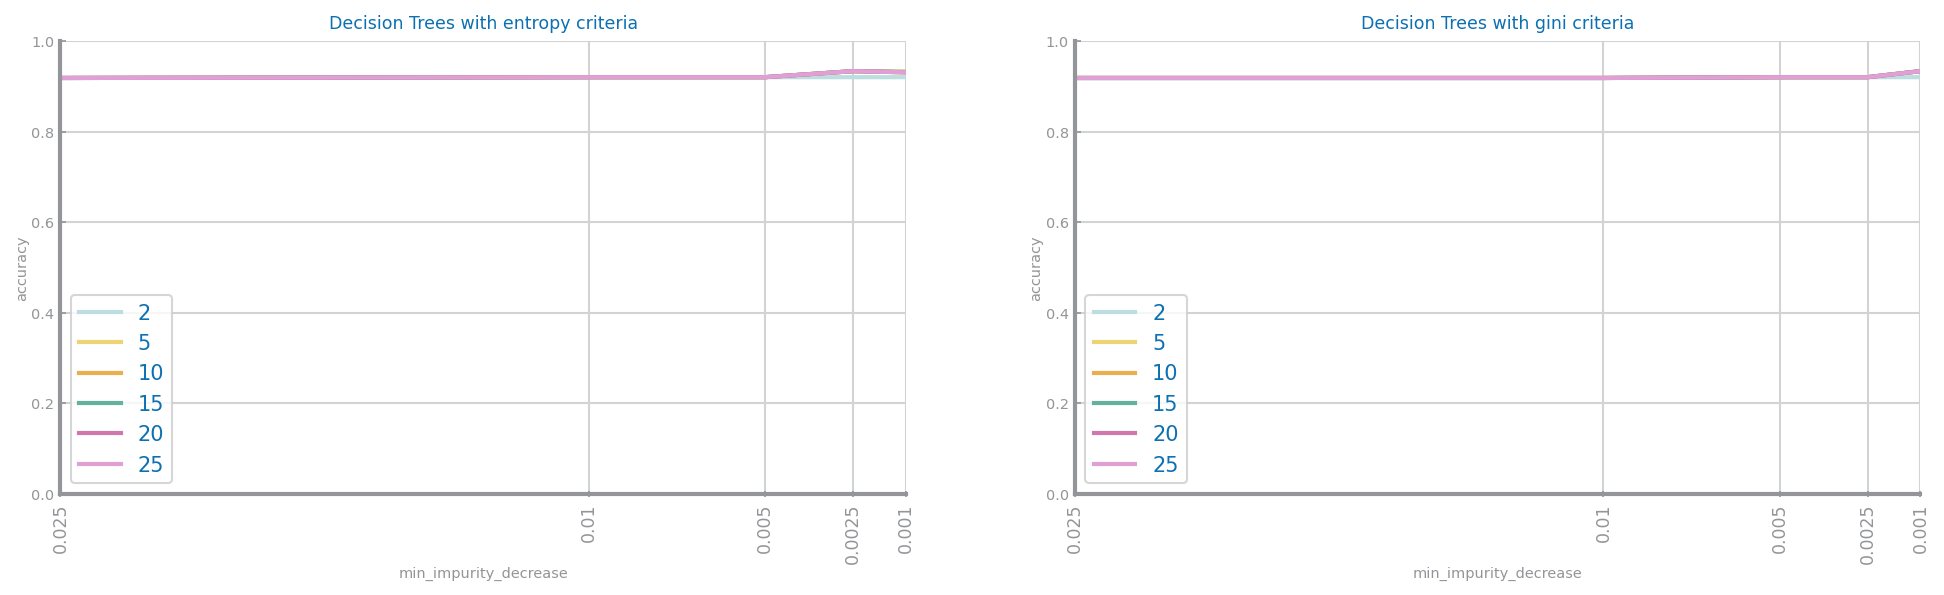

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

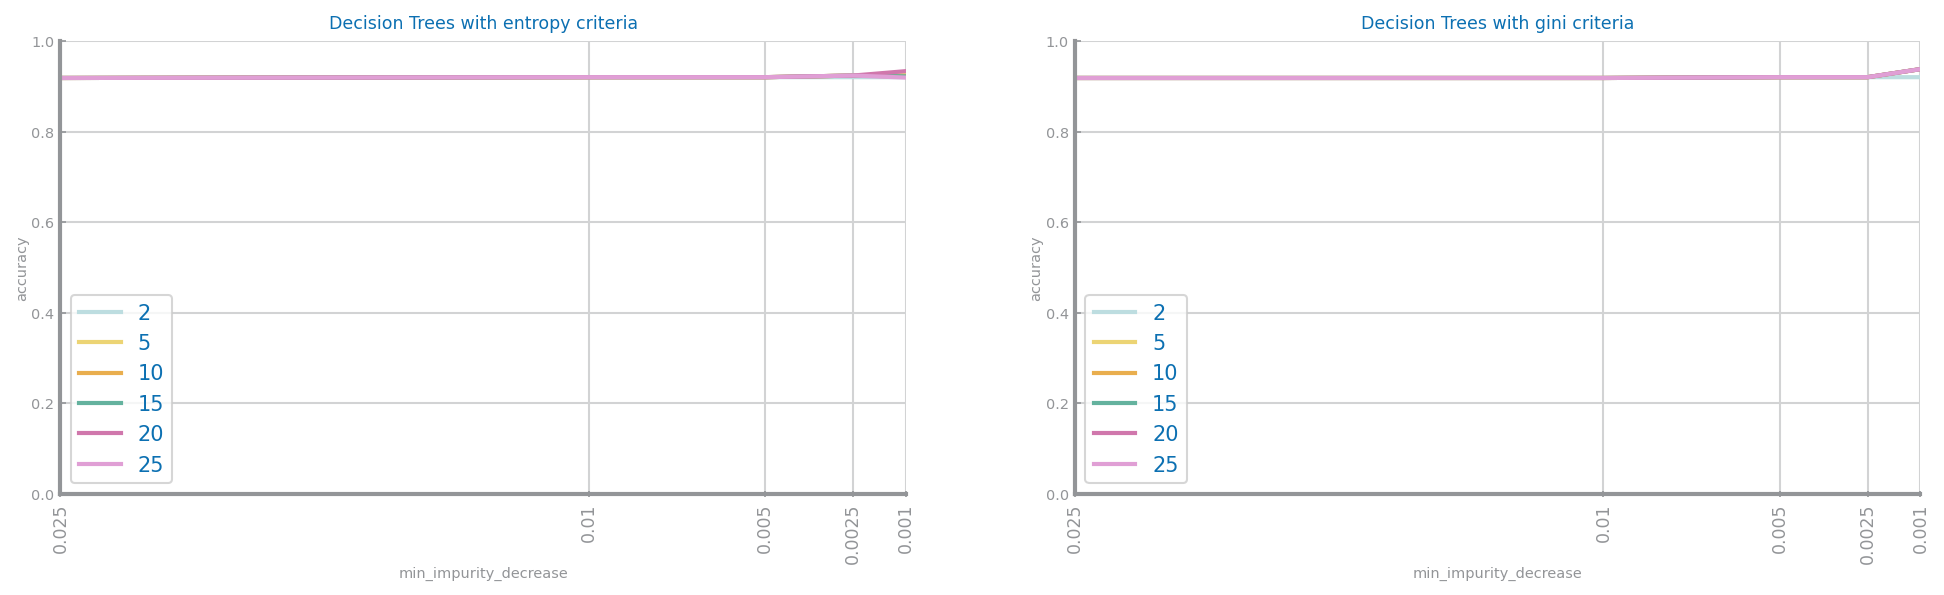

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.94


<Figure size 600x450 with 0 Axes>

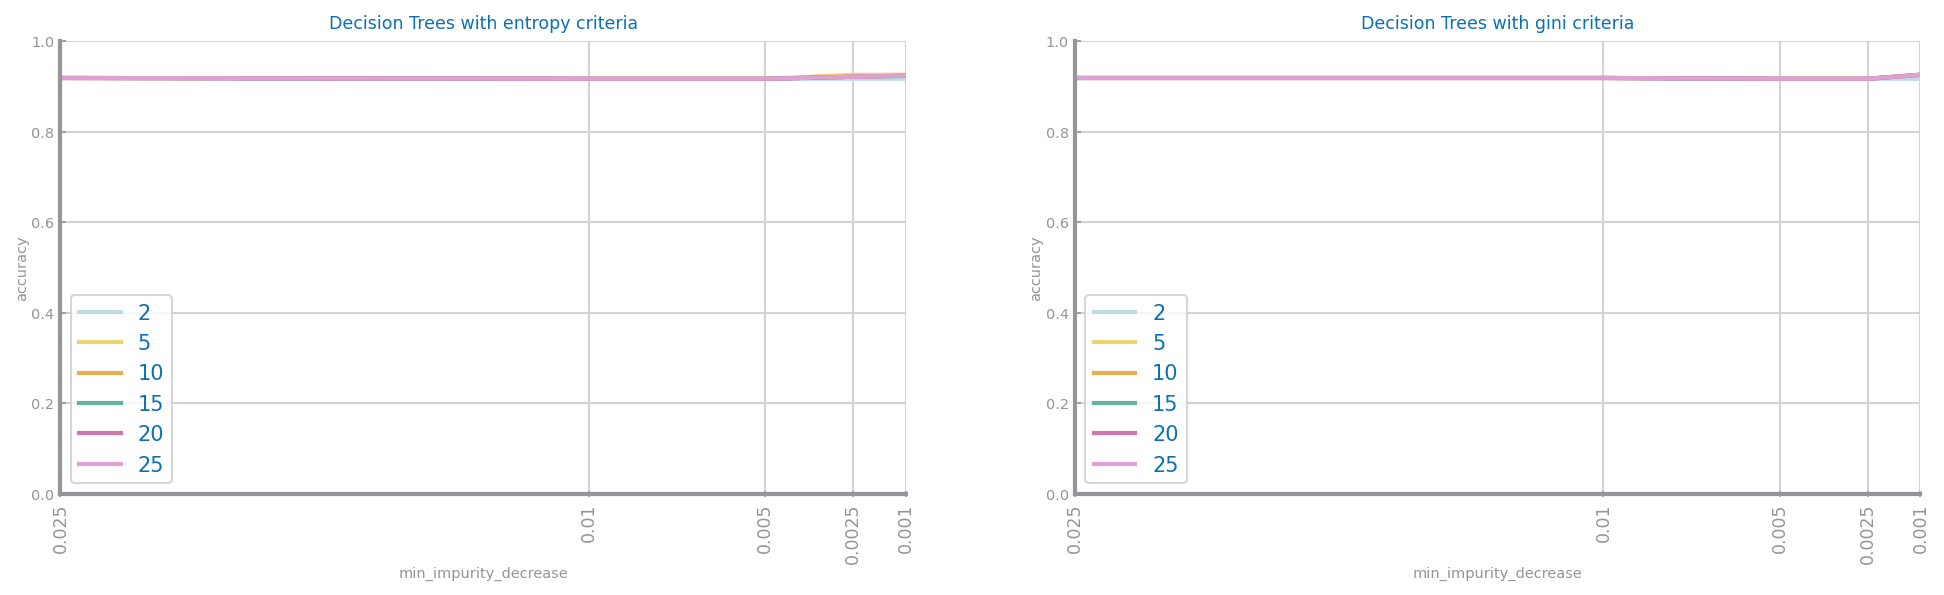

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

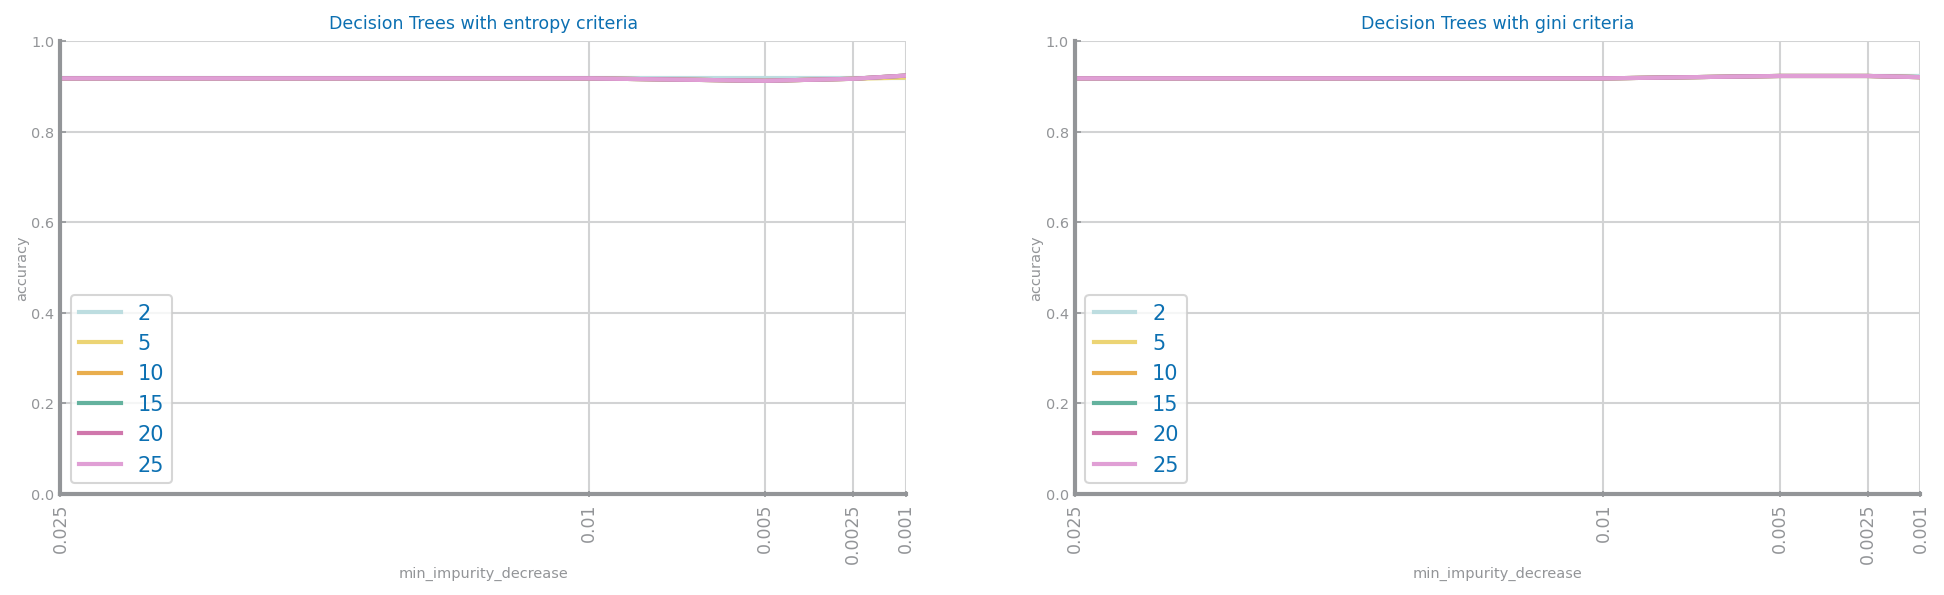

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.001 ==> accuracy=0.92


<Figure size 600x450 with 0 Axes>

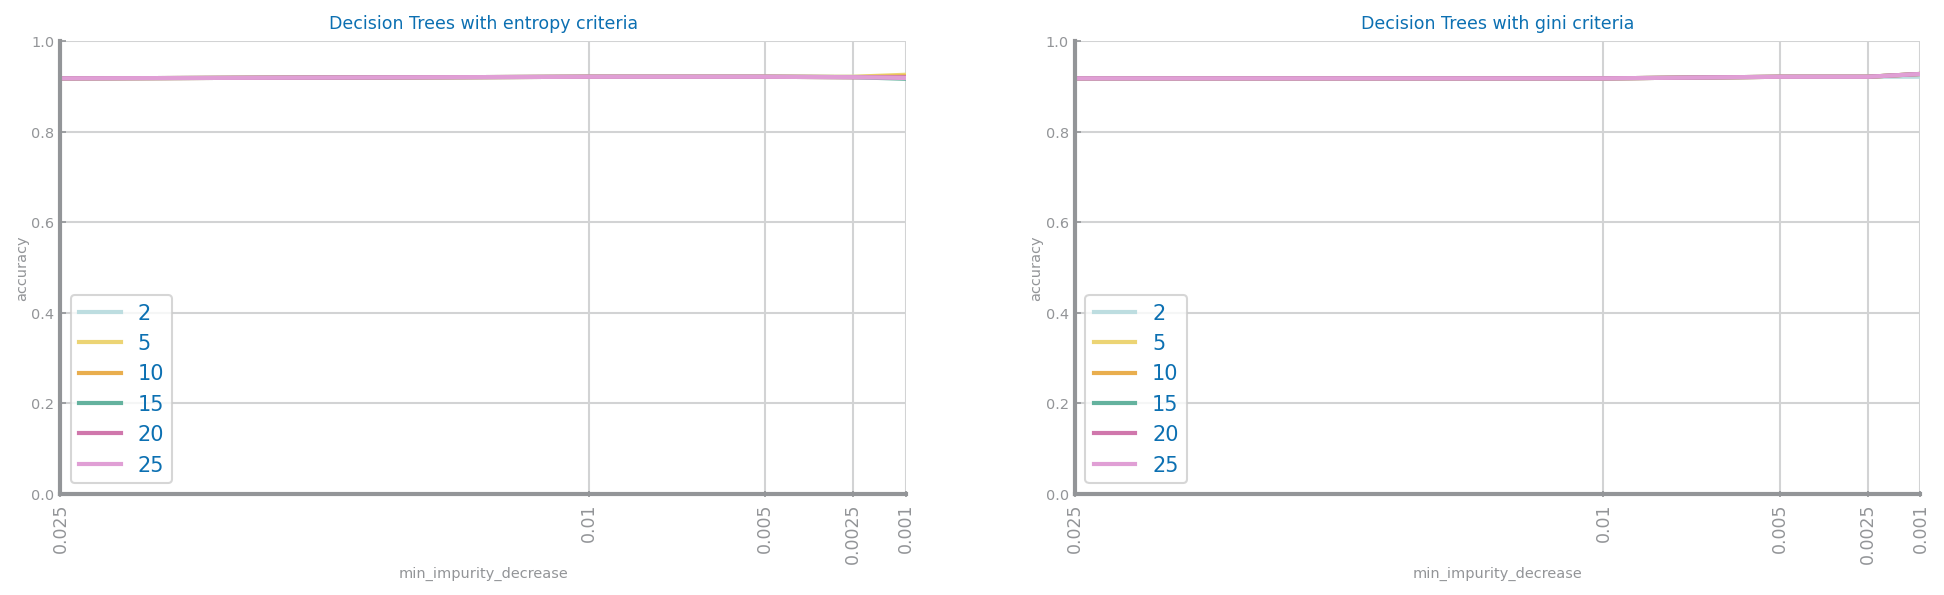

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

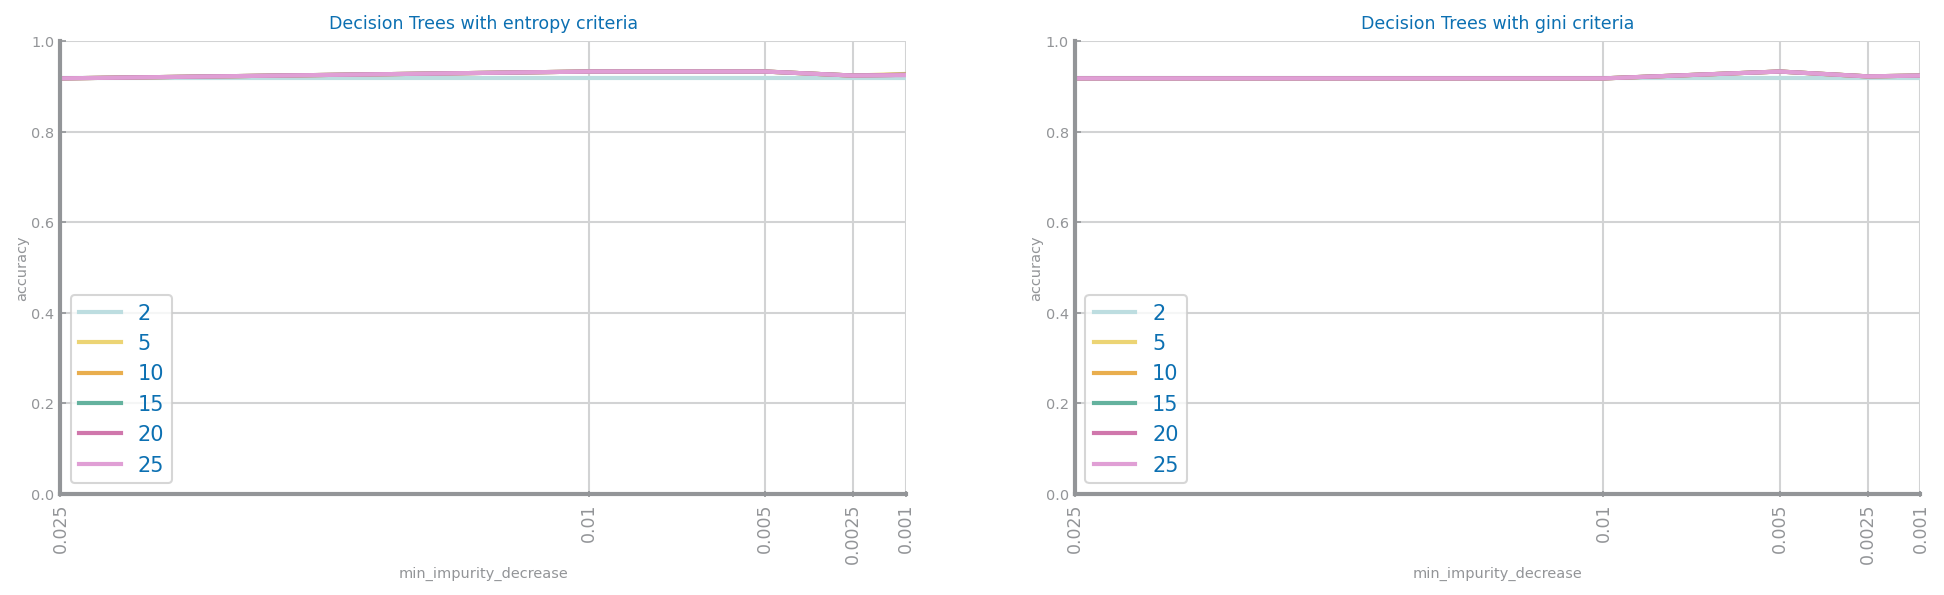

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.010 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

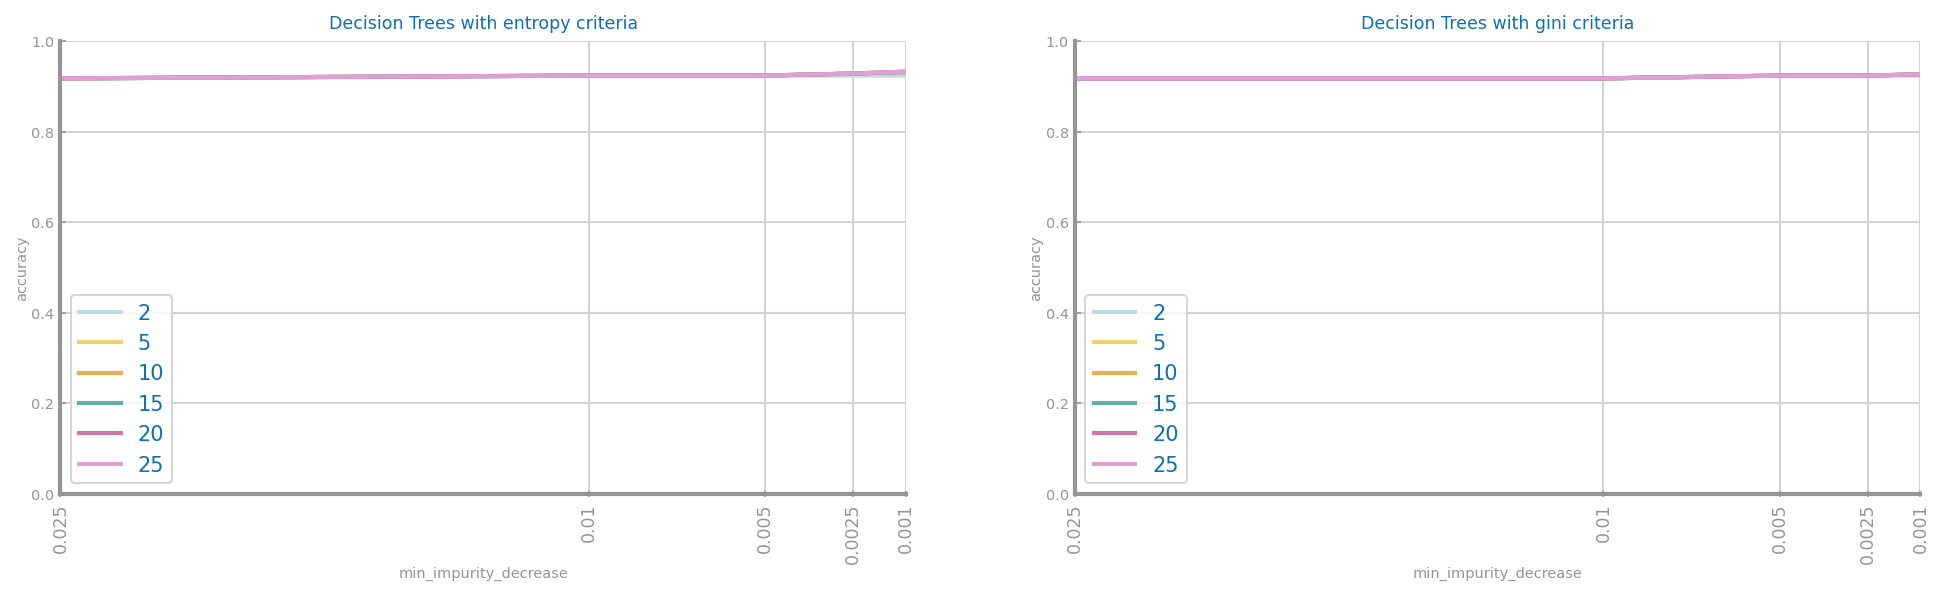

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

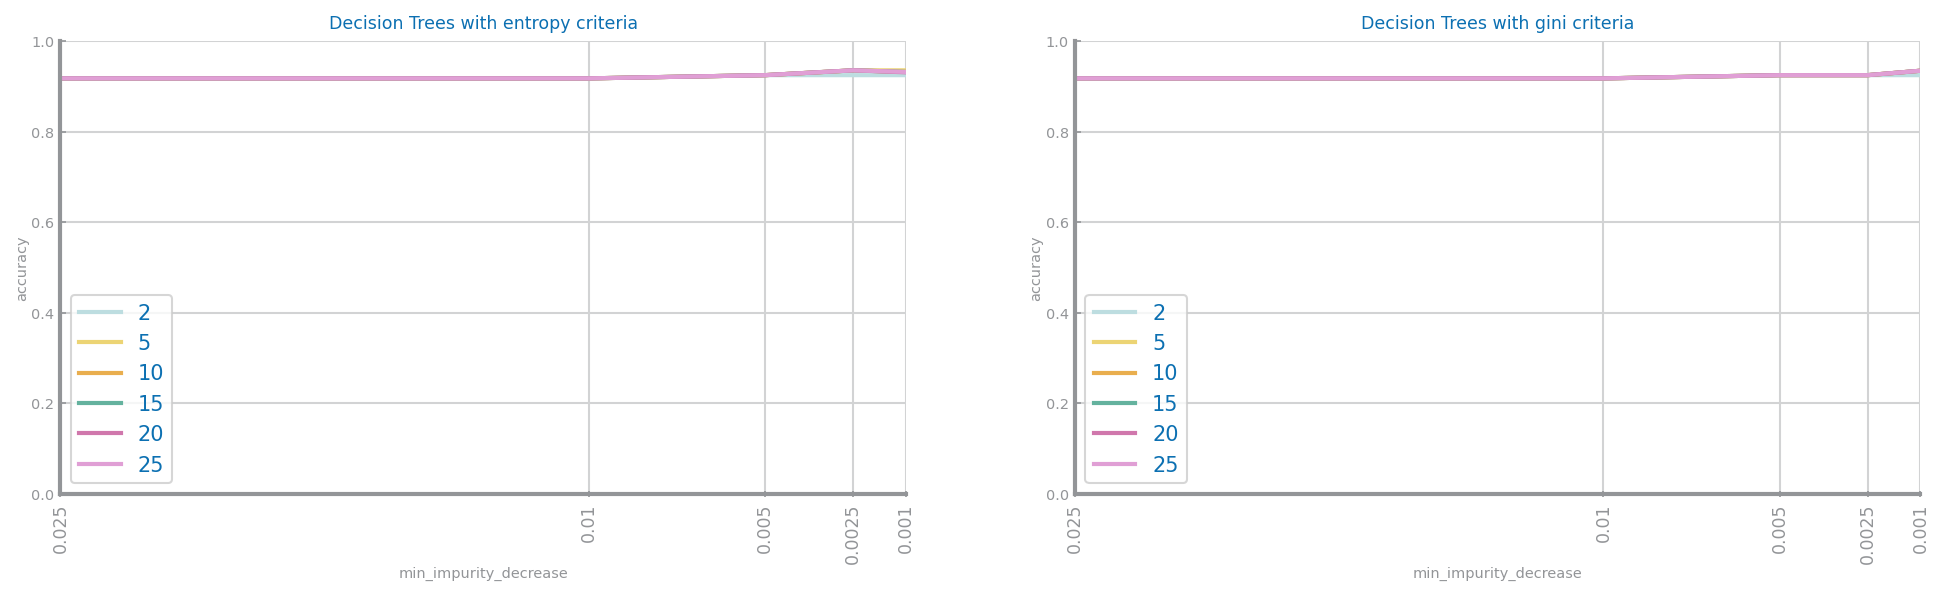

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.94
Confusion Matrix Test
TruePositives:  1022
FalsePositives:  64
TrueNegatives:  29
FalseNegatives:  9


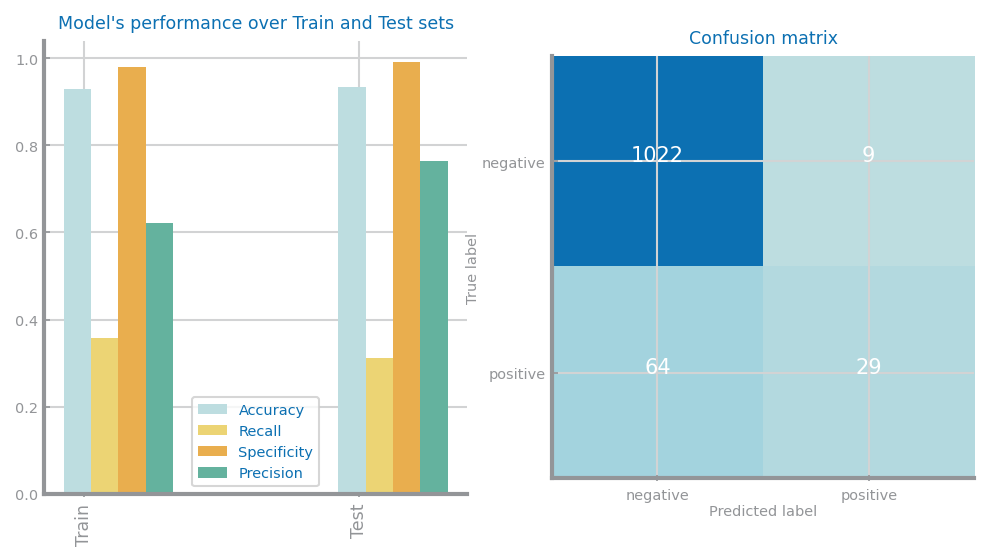

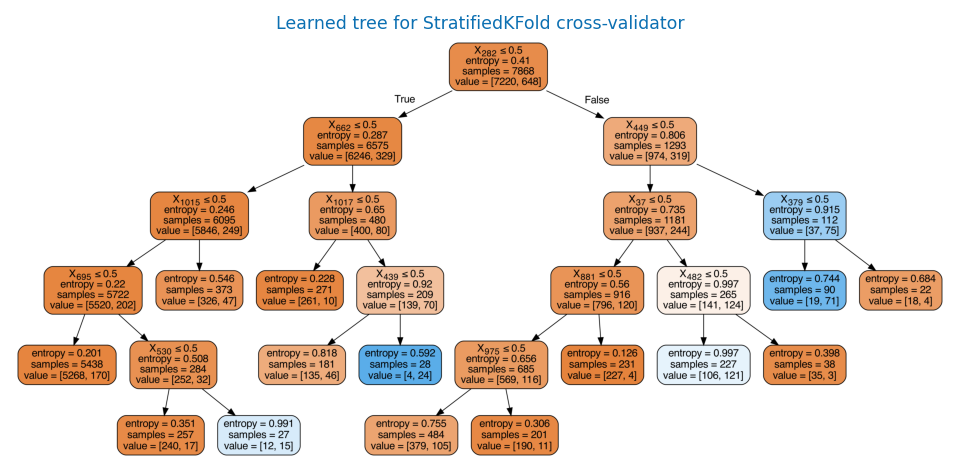

In [5]:
decision_tree_cross_validation(num_splits=8, data=data, n=3, splitting="StratifiedKFold")

<Figure size 600x450 with 0 Axes>

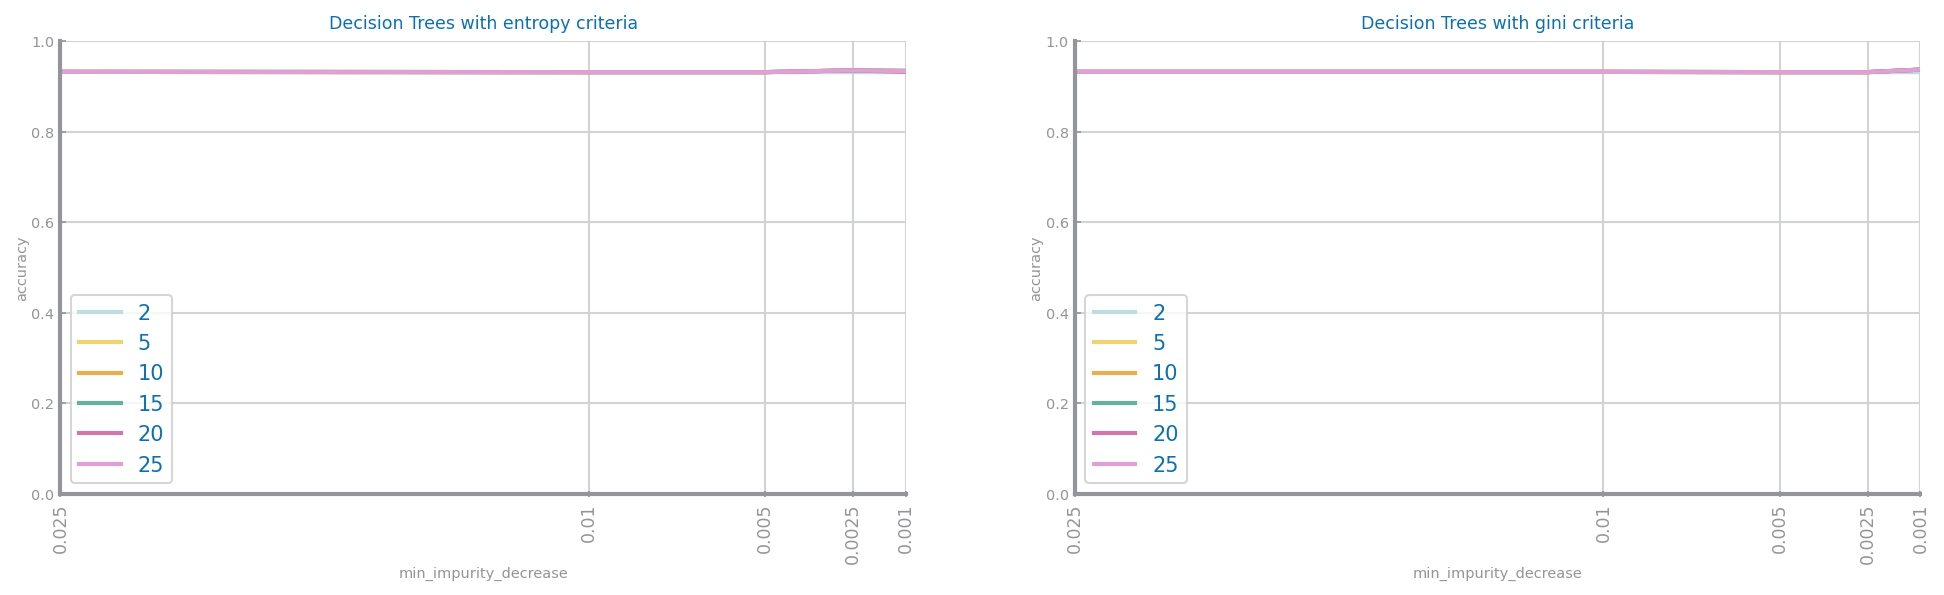

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.94


<Figure size 600x450 with 0 Axes>

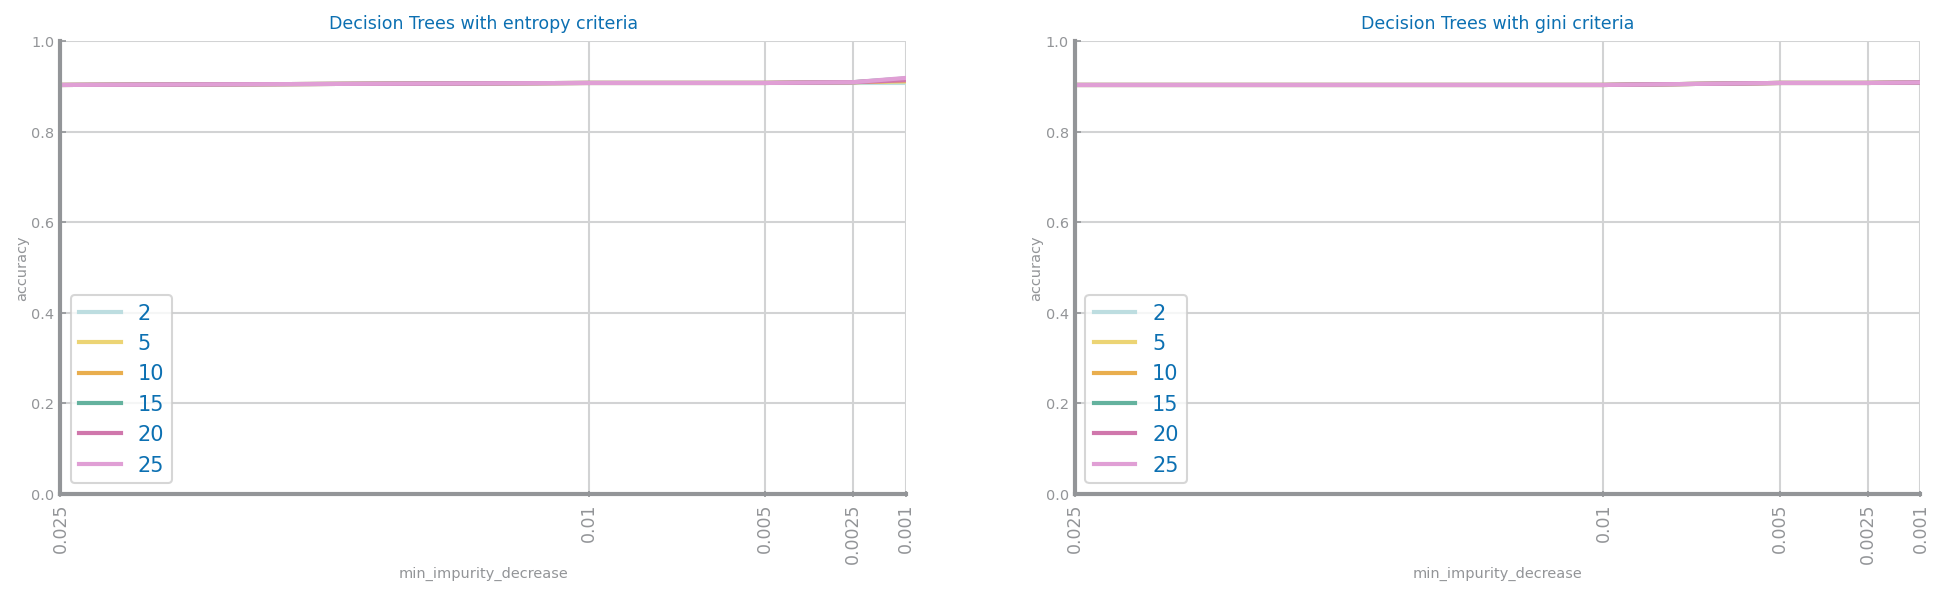

Best results achieved with entropy criteria, depth=25 and min_impurity_decrease=0.001 ==> accuracy=0.92


<Figure size 600x450 with 0 Axes>

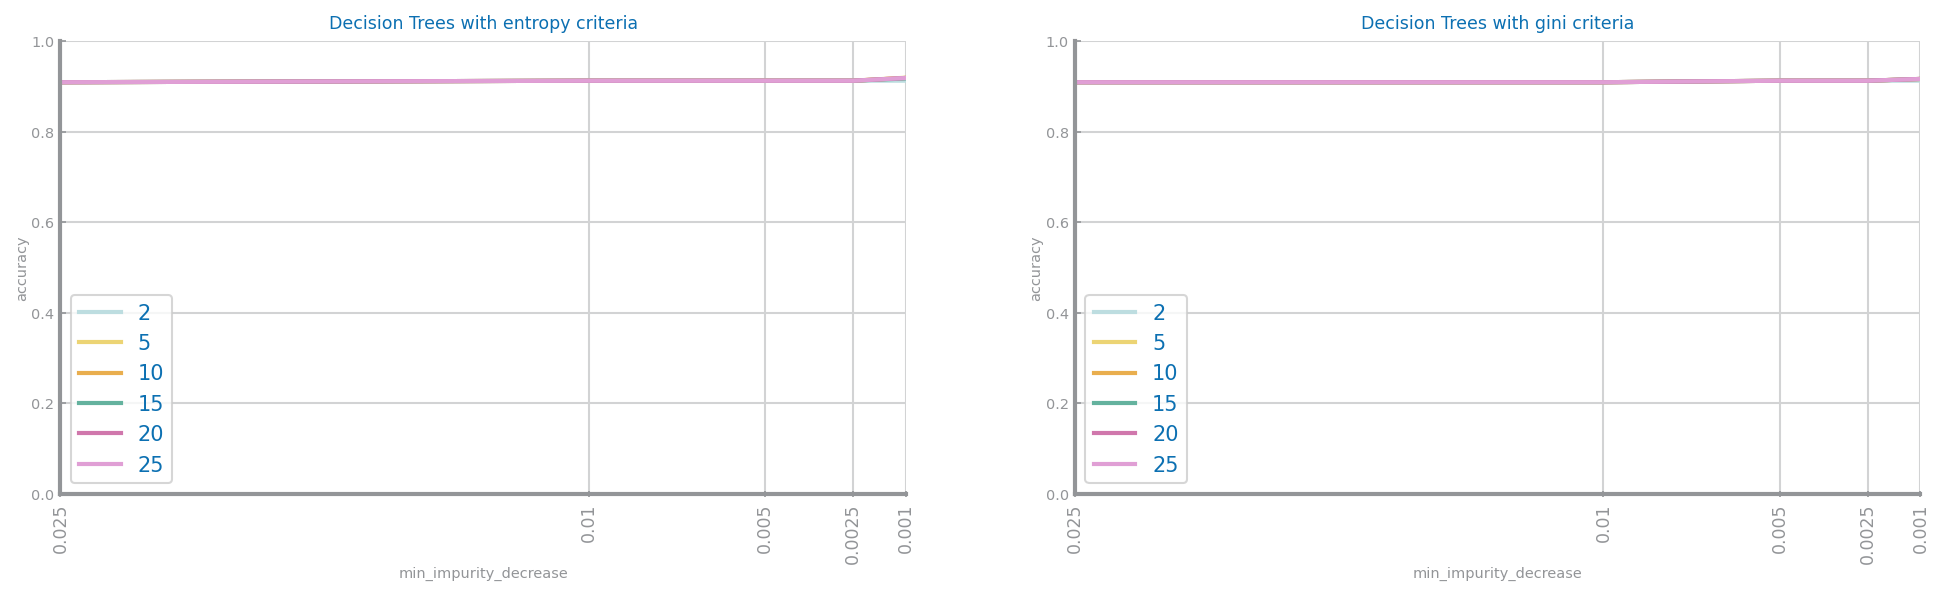

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.92


<Figure size 600x450 with 0 Axes>

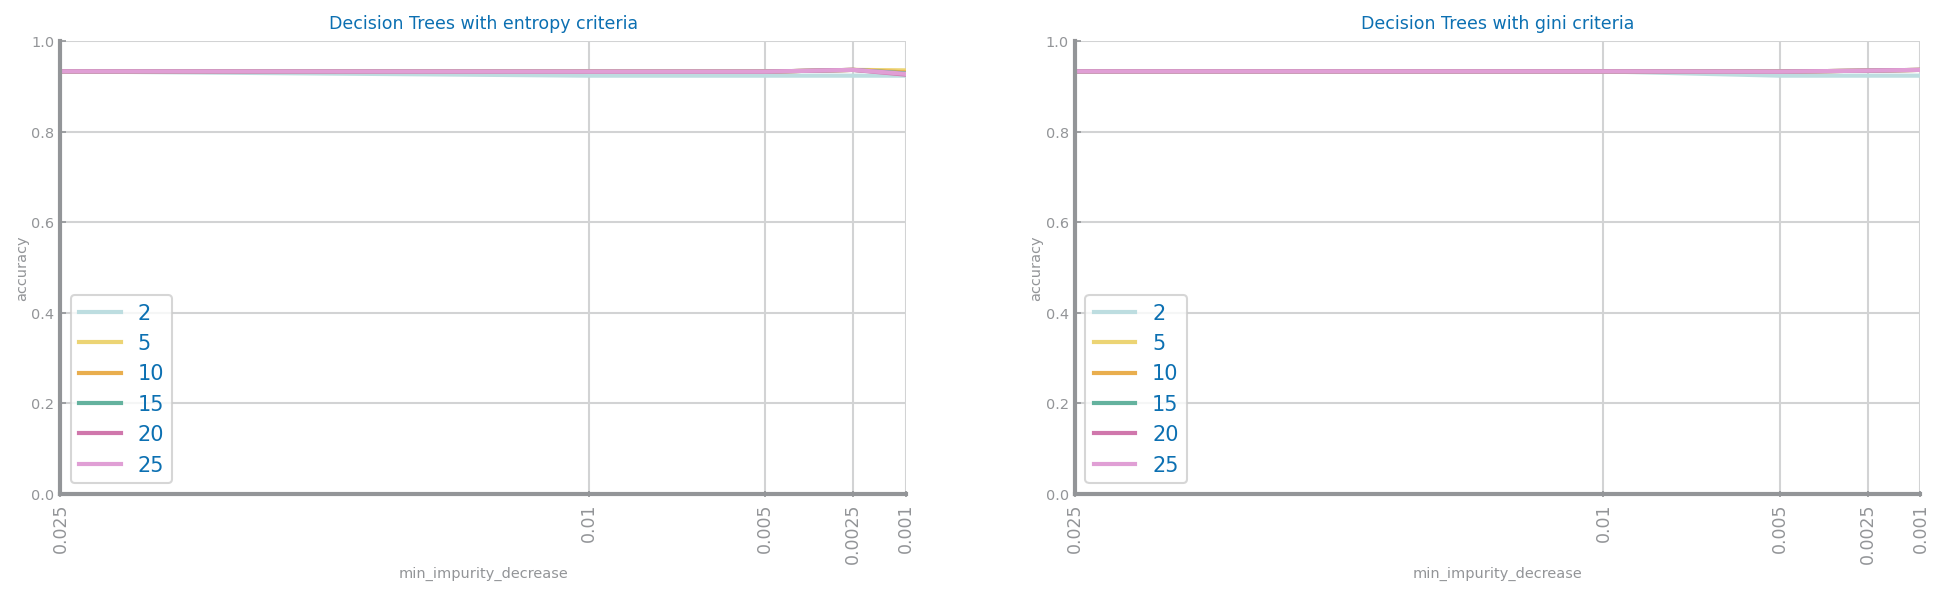

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.94


<Figure size 600x450 with 0 Axes>

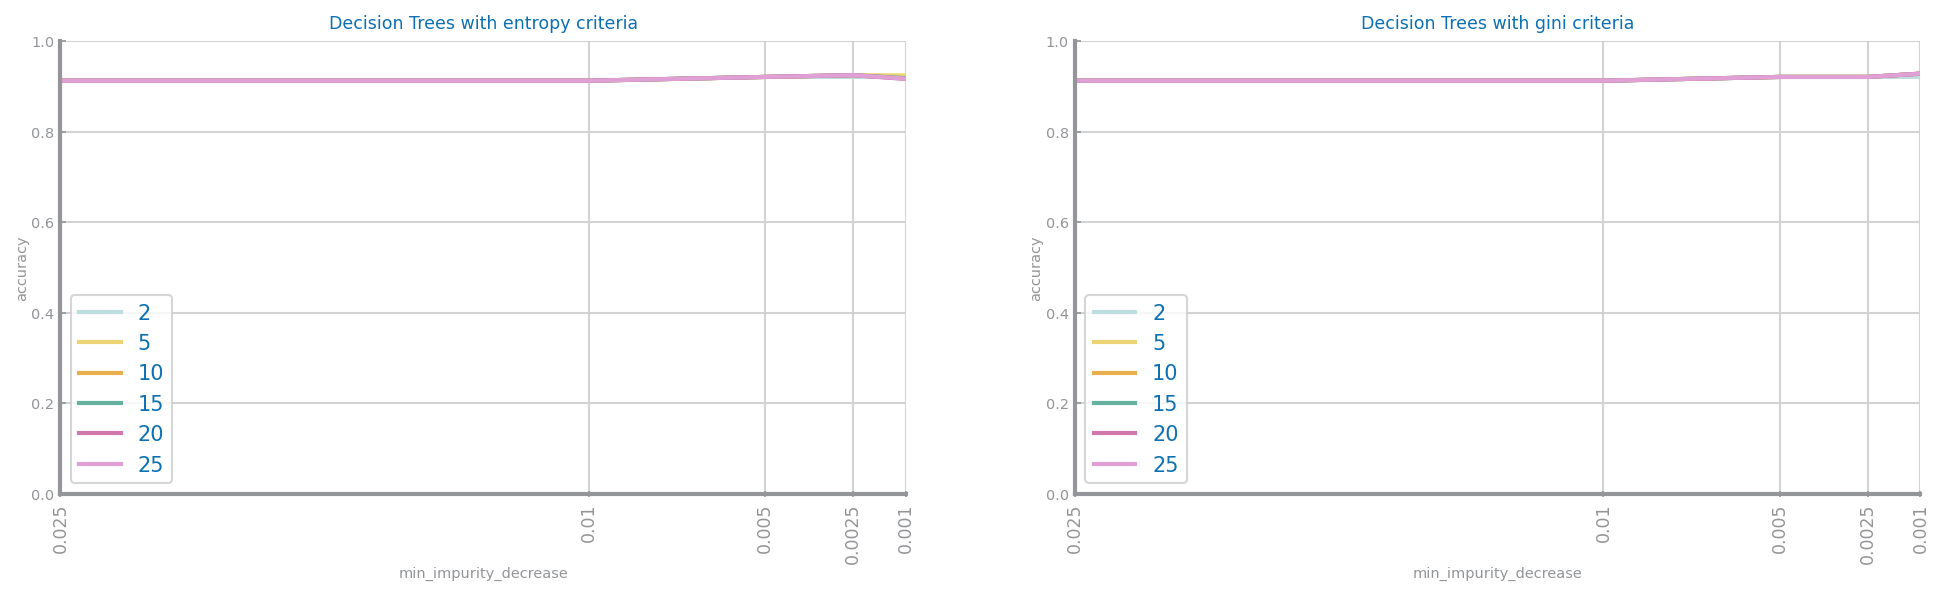

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93
Confusion Matrix Test
TruePositives:  1617
FalsePositives:  107
TrueNegatives:  51
FalseNegatives:  23


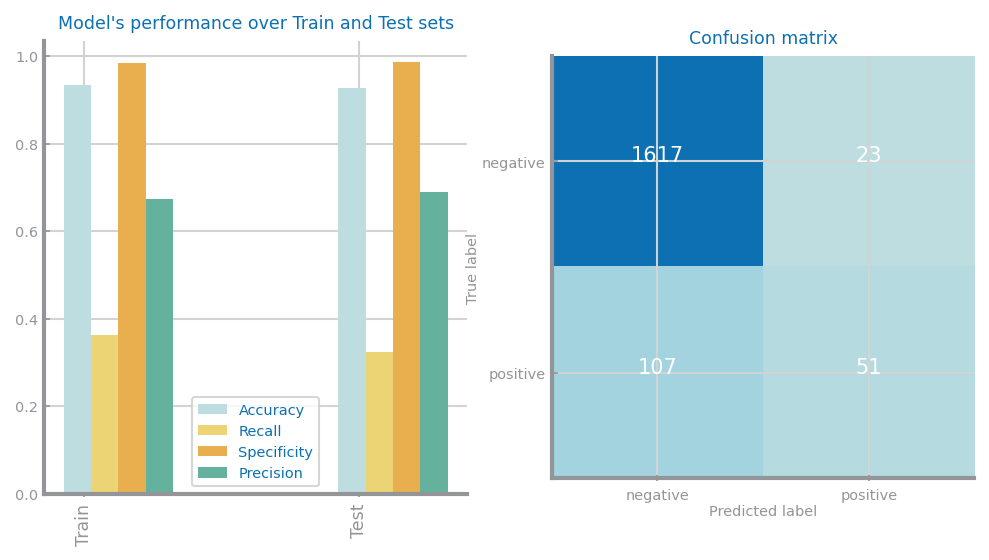

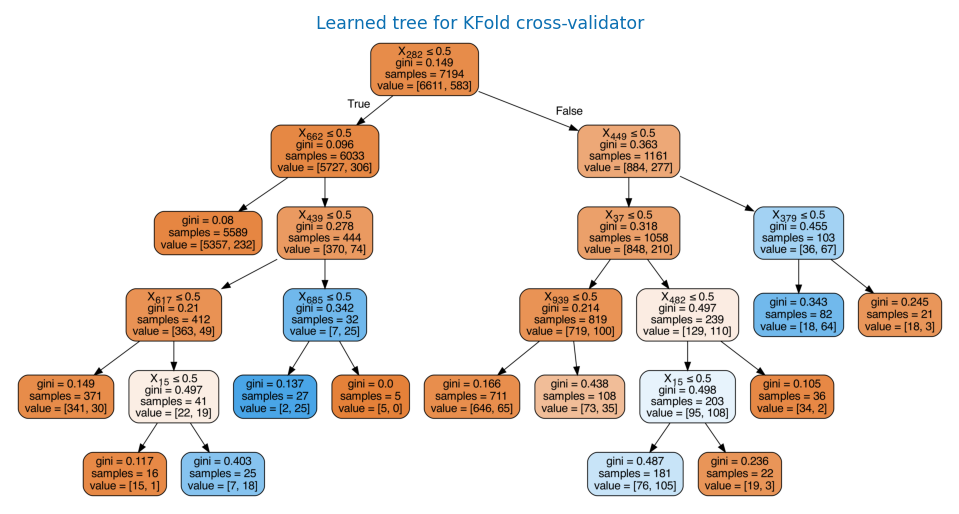

In [6]:
decision_tree_cross_validation(num_splits=5, data=data, n=3, splitting="KFold")

<Figure size 600x450 with 0 Axes>

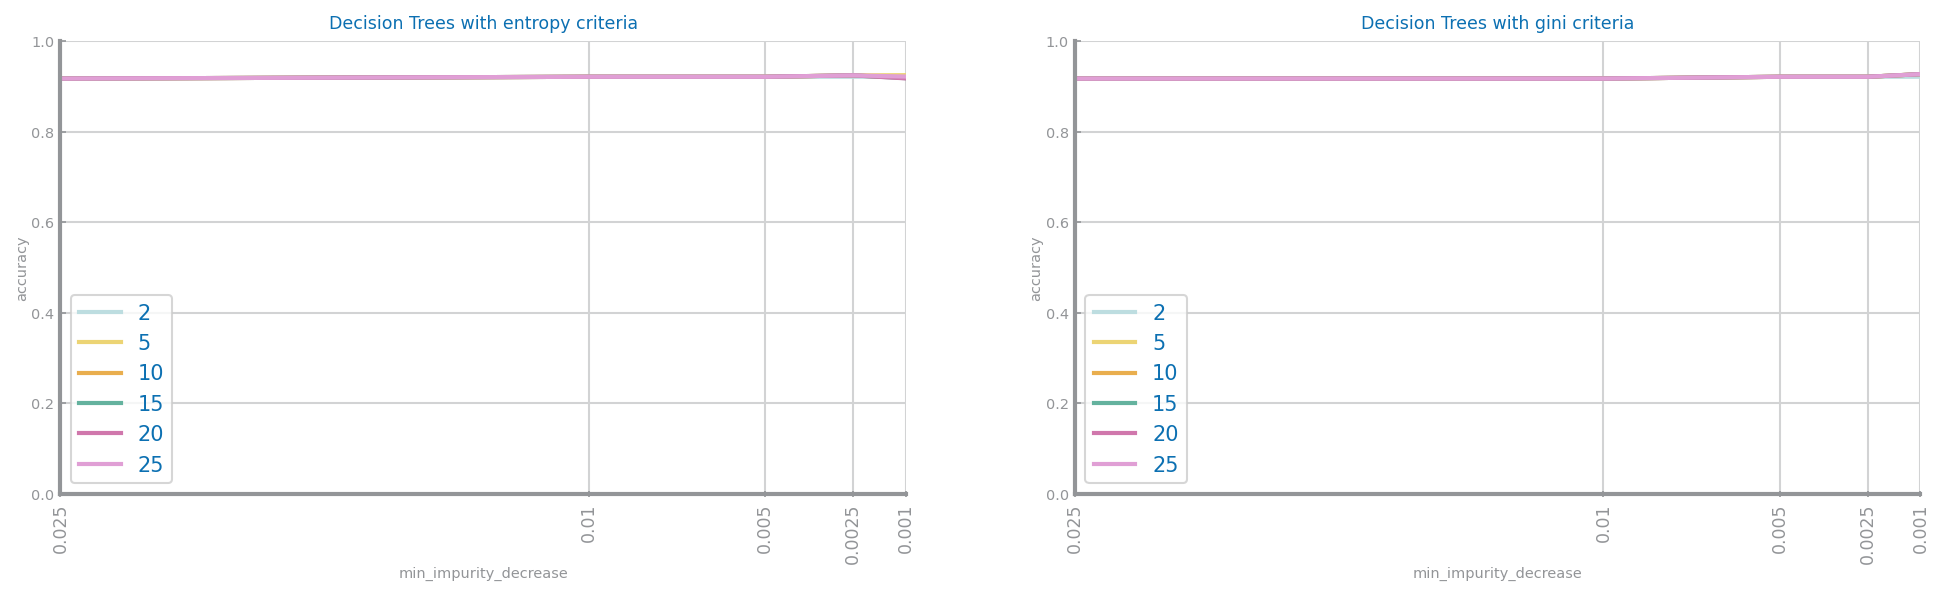

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

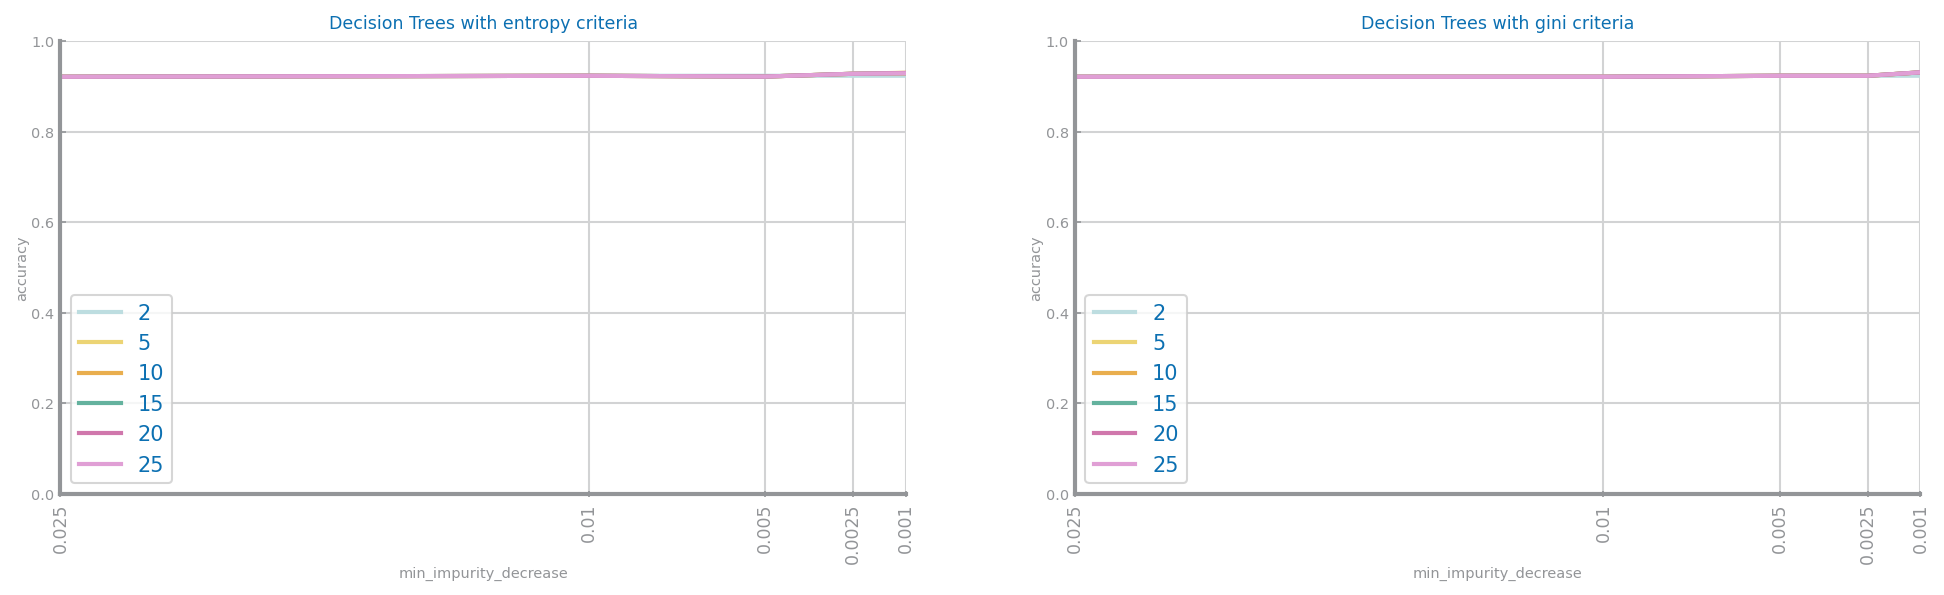

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

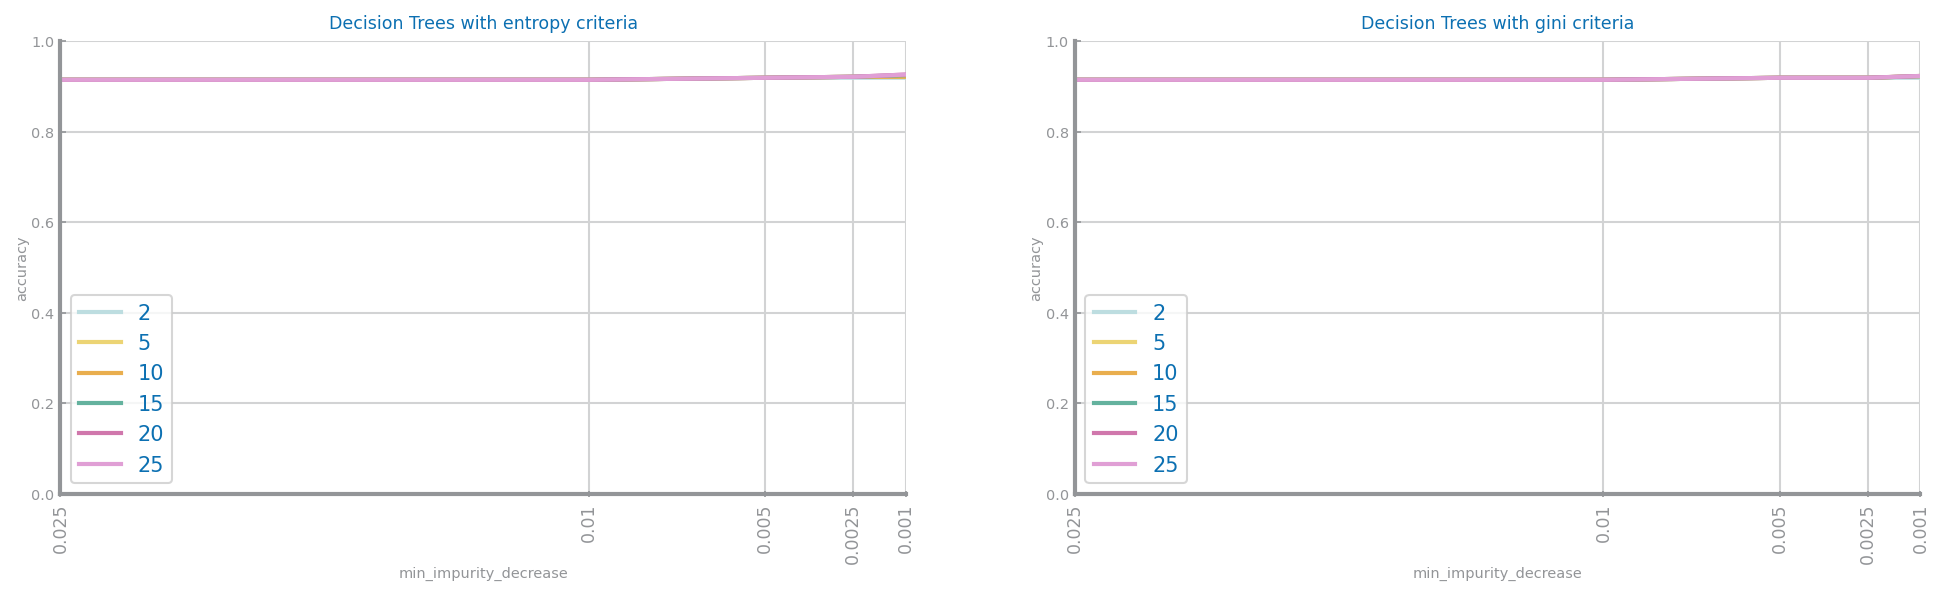

Best results achieved with entropy criteria, depth=20 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

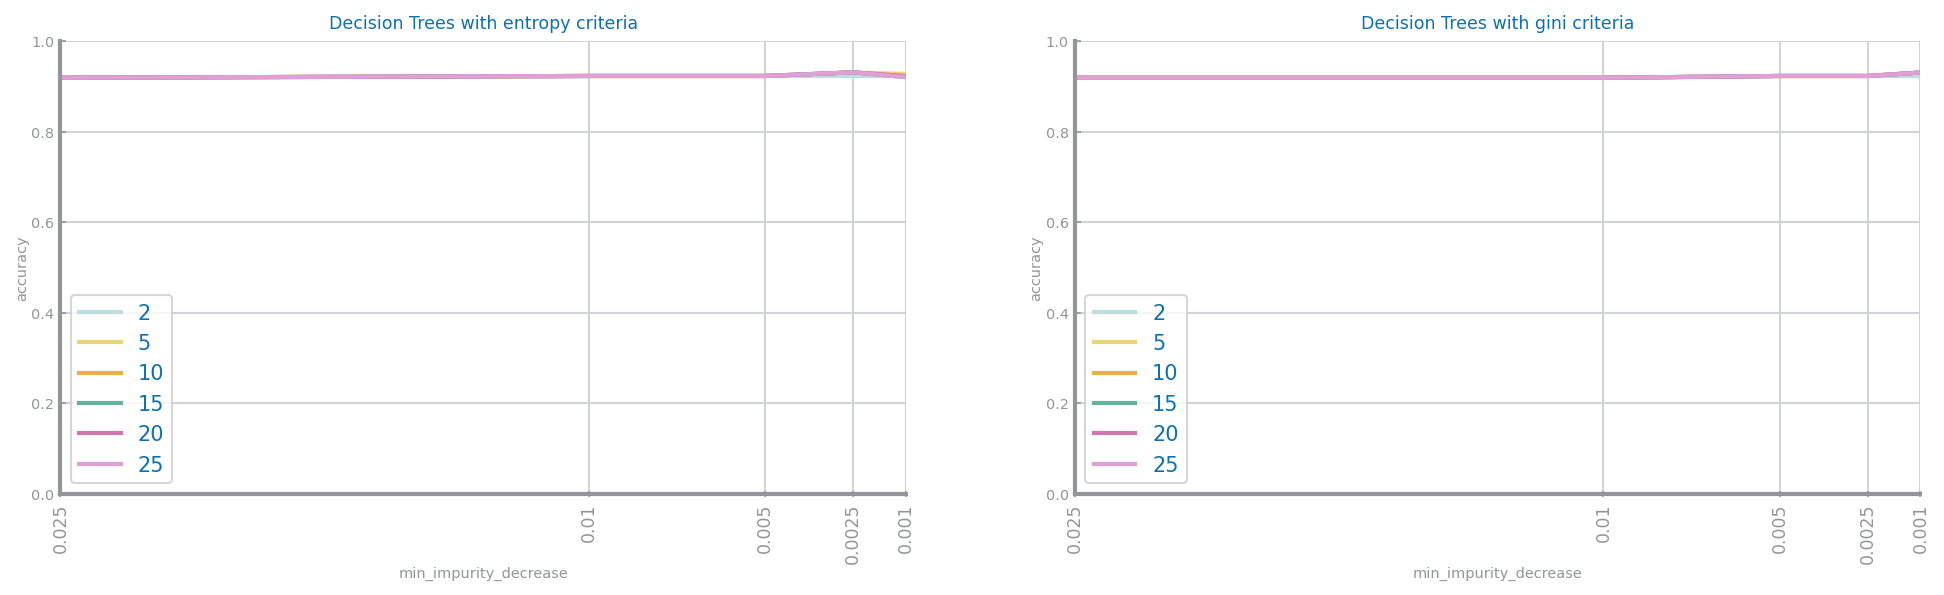

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

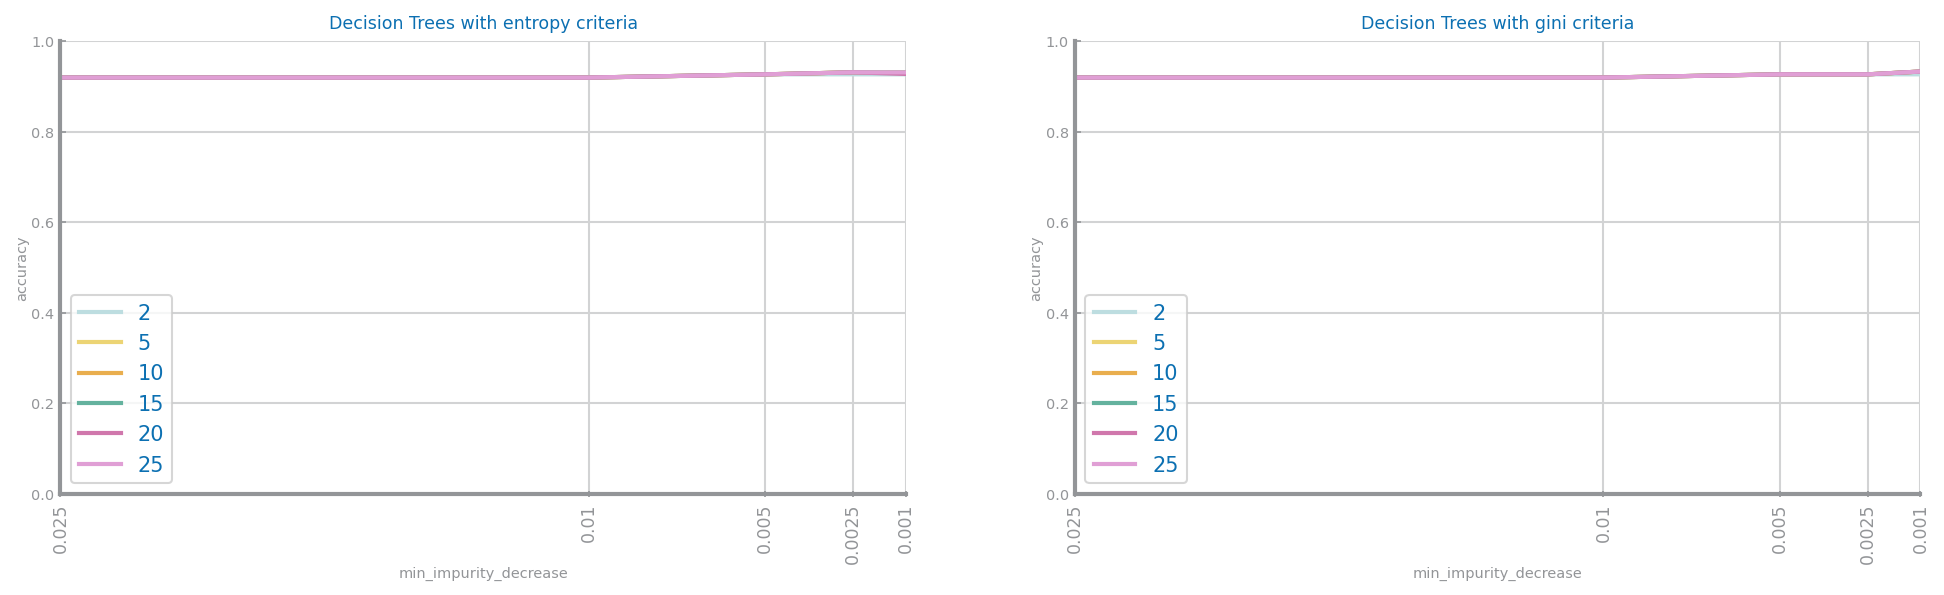

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93
Confusion Matrix Test
TruePositives:  2036
FalsePositives:  122
TrueNegatives:  60
FalseNegatives:  30


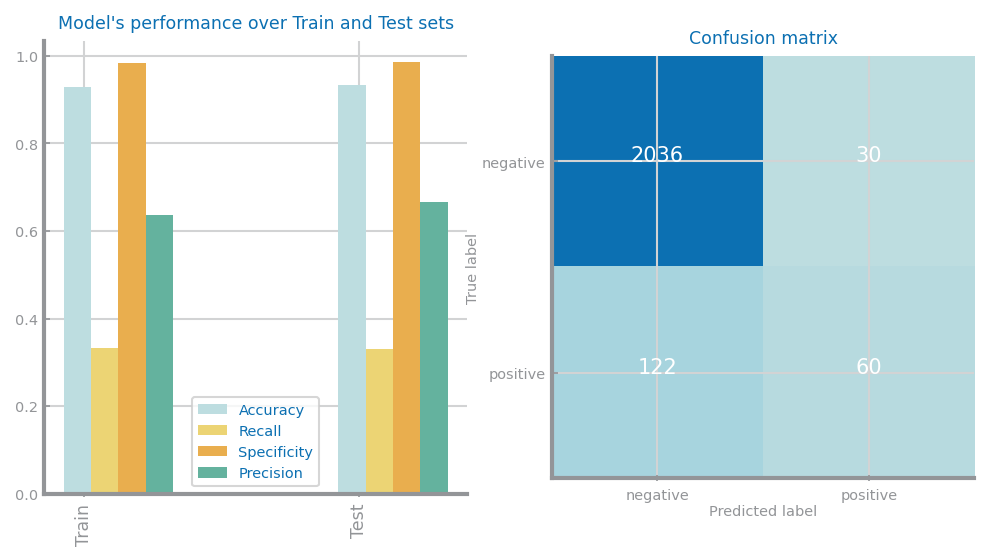

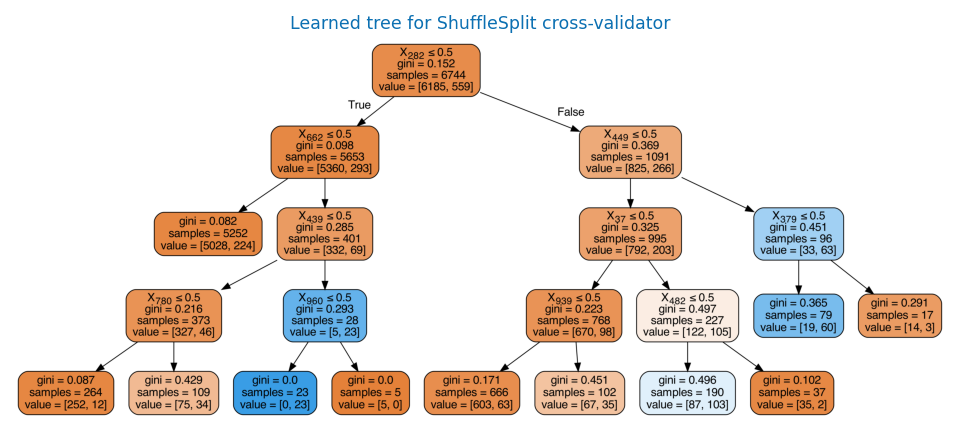

In [8]:
decision_tree_cross_validation(num_splits=5, data=data, n=3, splitting="ShuffleSplit")

<Figure size 600x450 with 0 Axes>

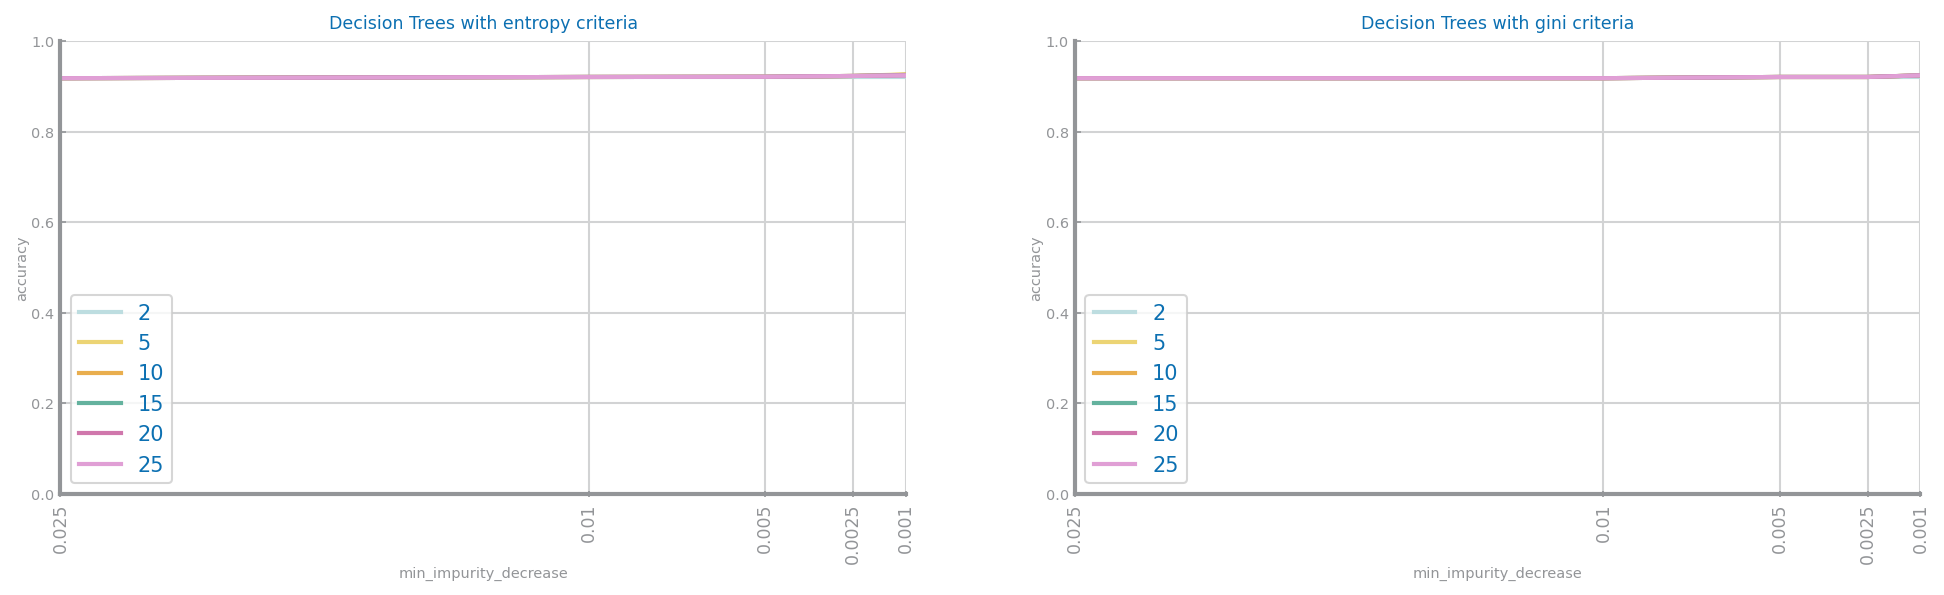

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

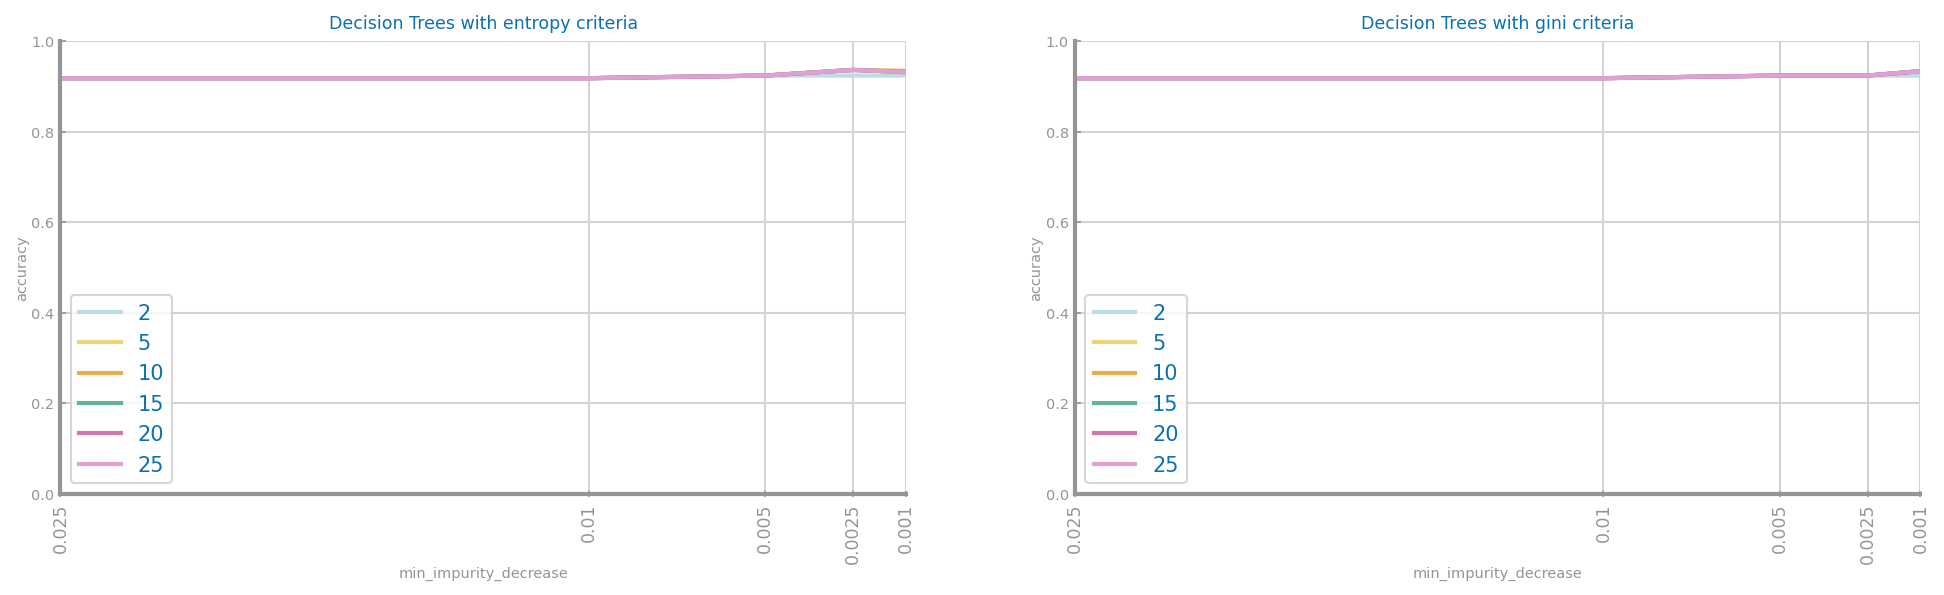

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.003 ==> accuracy=0.94


<Figure size 600x450 with 0 Axes>

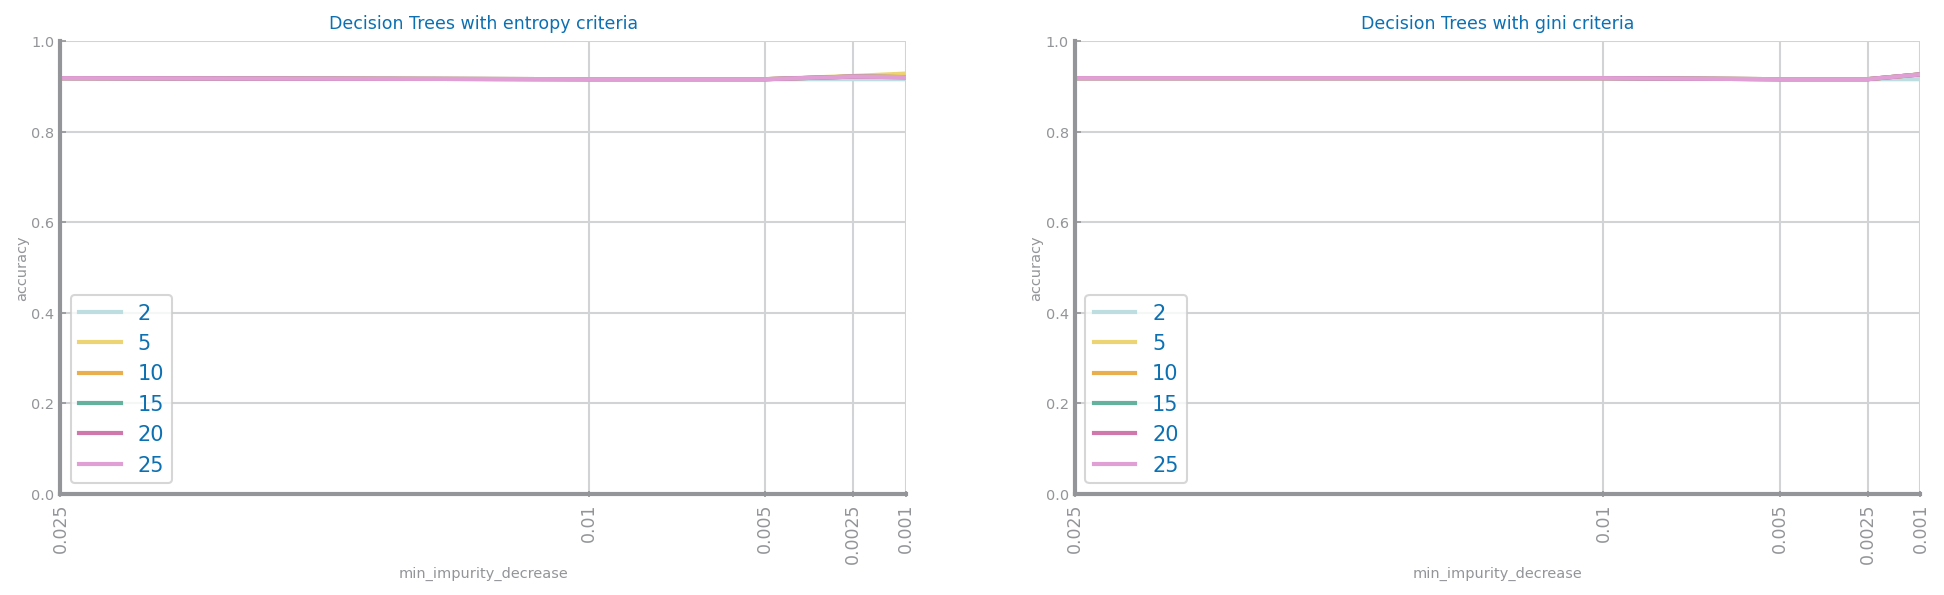

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

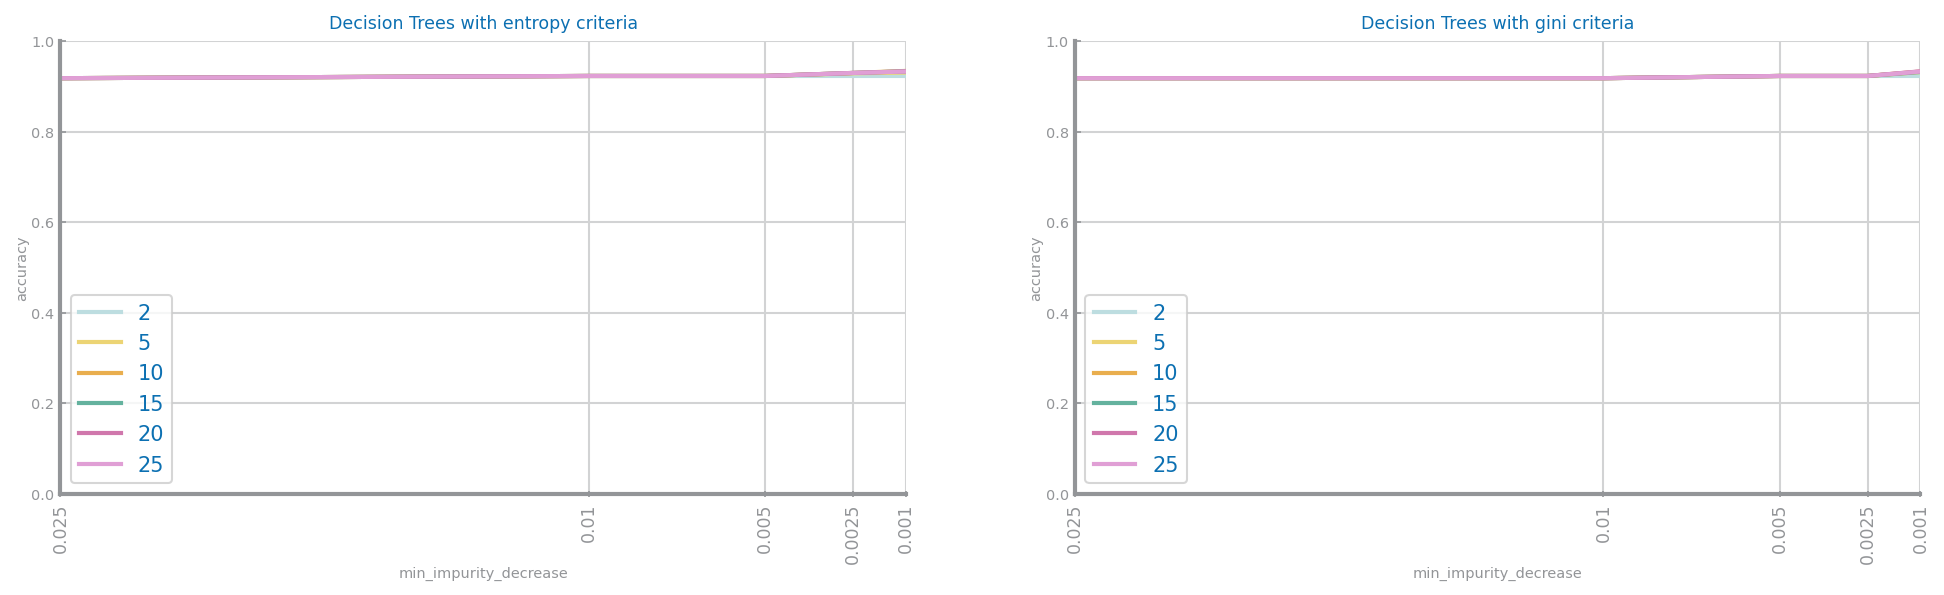

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

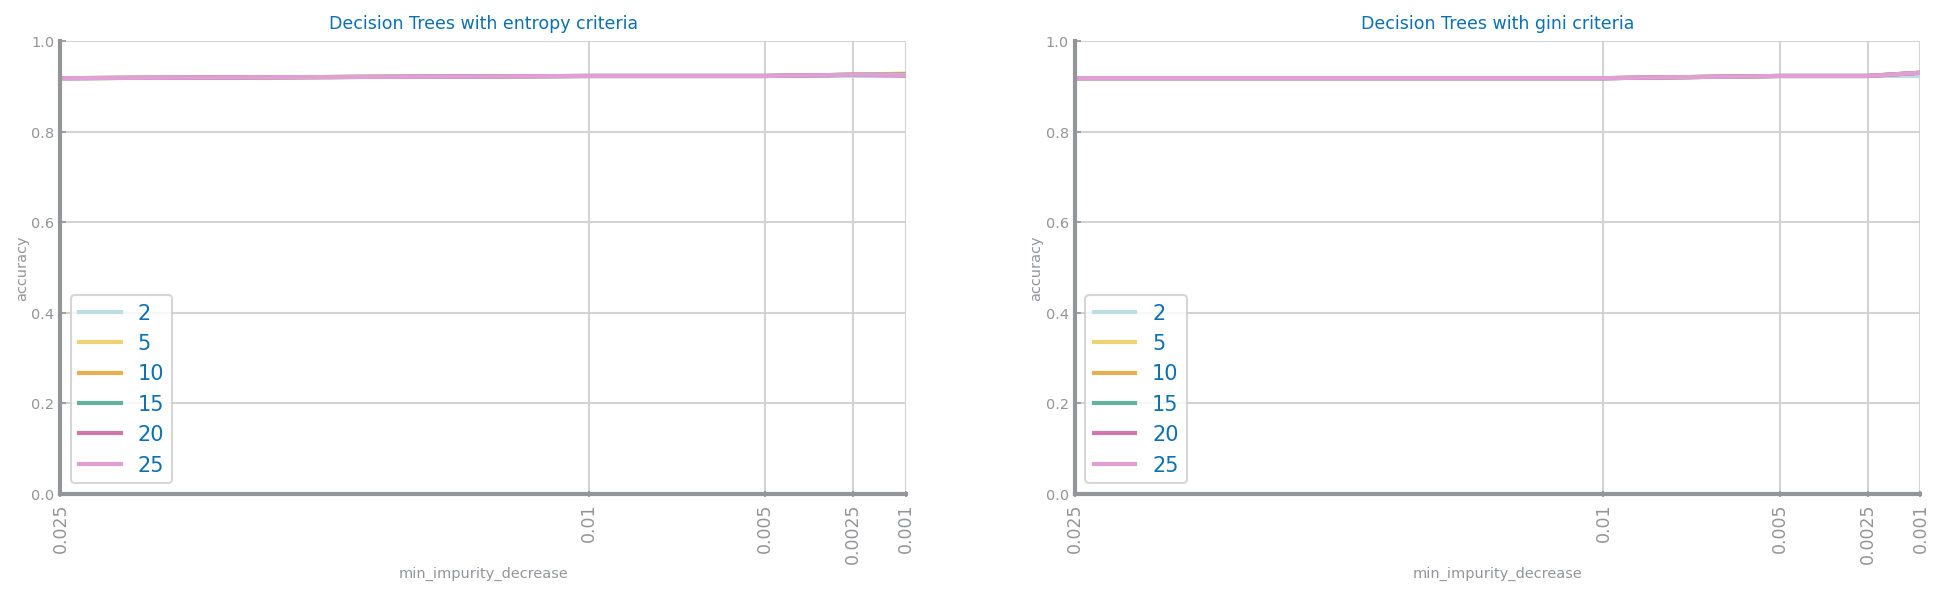

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93


<Figure size 600x450 with 0 Axes>

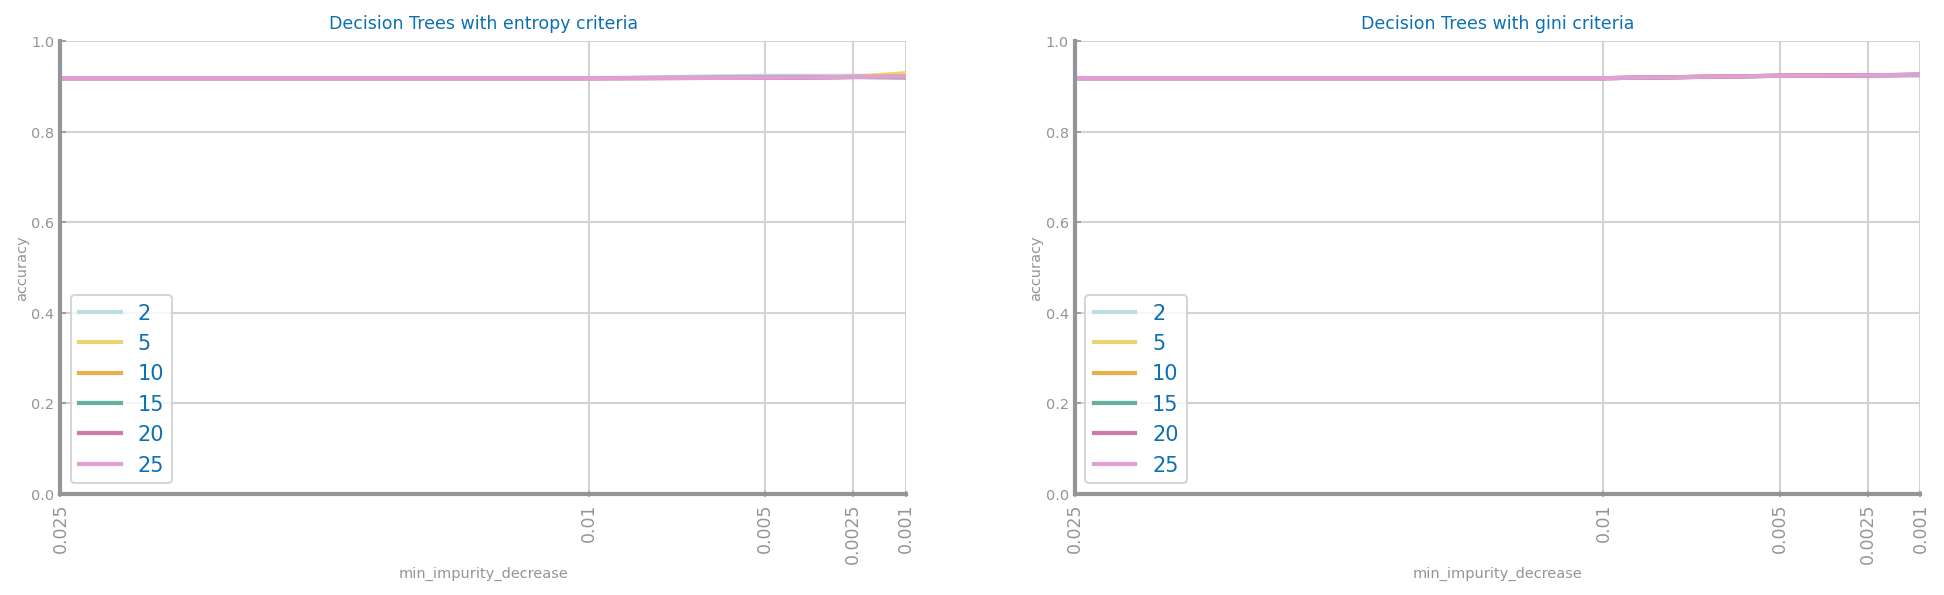

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.001 ==> accuracy=0.93
Confusion Matrix Test
TruePositives:  2027
FalsePositives:  124
TrueNegatives:  61
FalseNegatives:  36


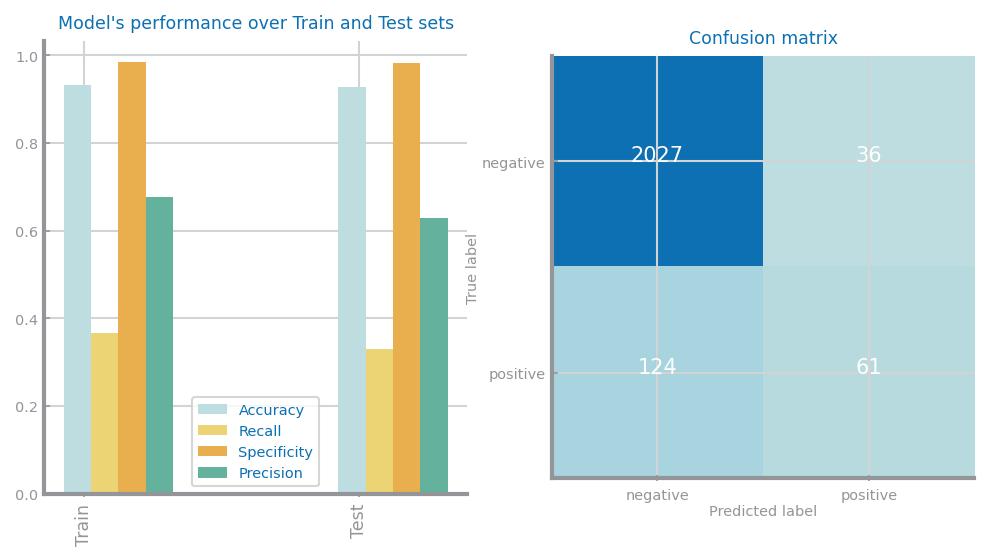

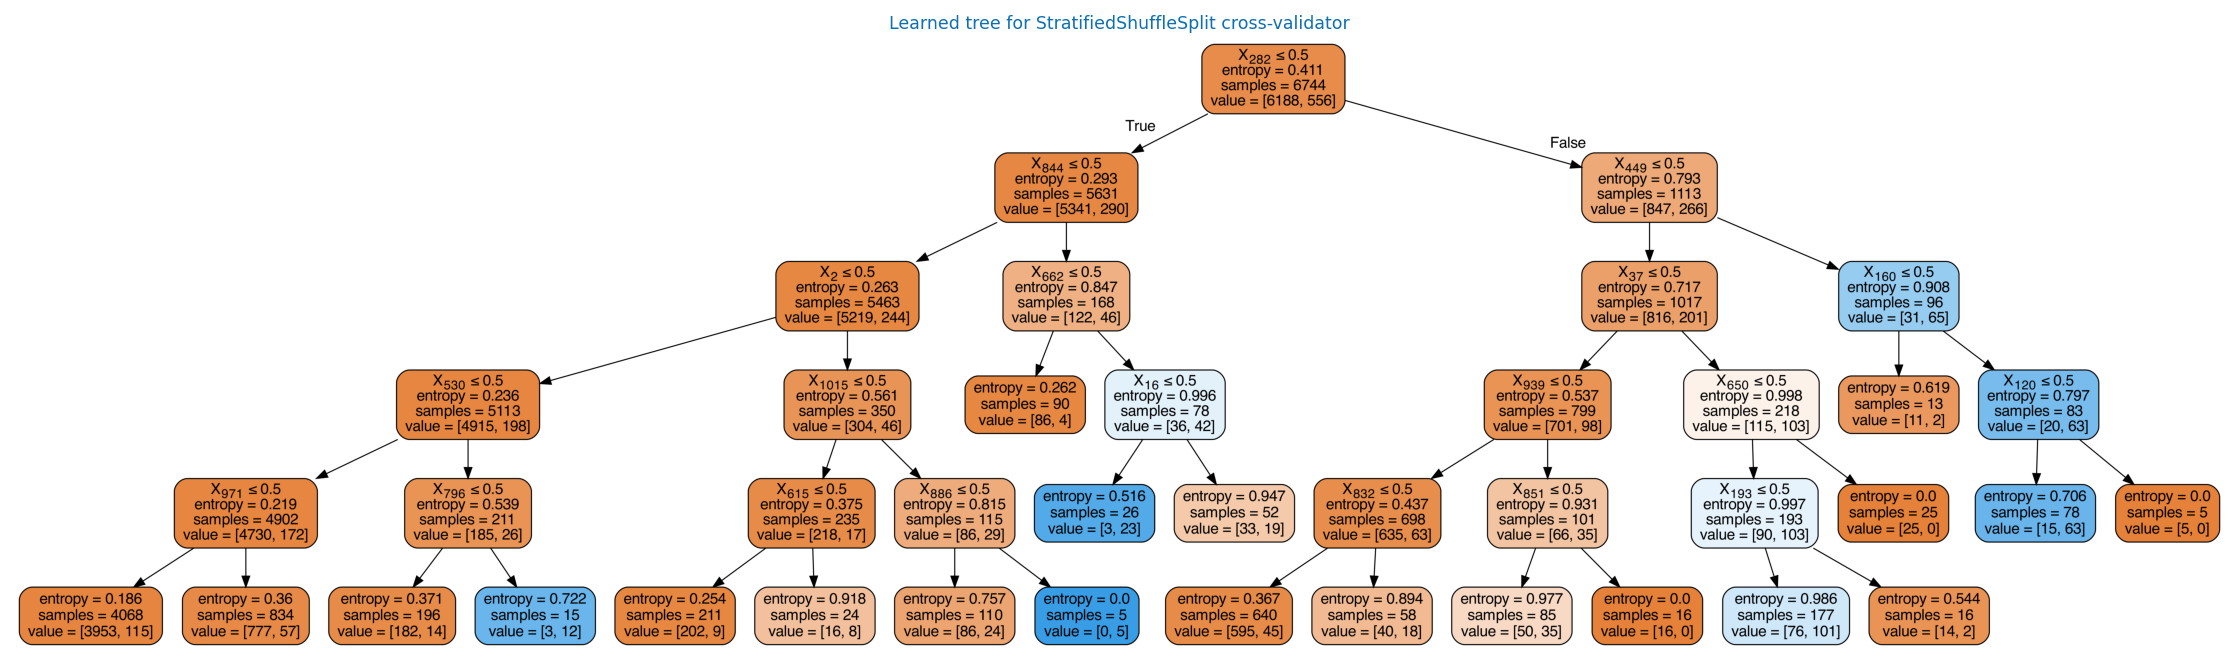

In [13]:
decision_tree_cross_validation(num_splits=6, data=data, n=3, splitting="StratifiedShuffleSplit")

# Overfitting